In [19]:
import numpy as np
import bisect
import time

In [67]:
import matplotlib.patches as mplpatches

In [1]:
import sys
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/seqUtils/src/')
import time
from seqUtil import *
from bamUtil import *
from nanoUtil import *
from nntUtil import *
from modPredict import *
import matplotlib.pyplot as plt
import seaborn as sns
pos_bam = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/mapping/unique.500.pass.sorted.bam'
neg_bam = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/mapping/unique.0.pass.sorted.bam'
ref = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/sacCer3.fa'
pos_evt = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/eventalign/unique.500.eventalign.tsv'
neg_evt = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/eventalign/unique.0.eventalign.tsv'

PHO5_pos_sigAlign= '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/eventalign/PHO5_pos_chrII:429000-435000siganlAlign.tsv'
PHO5_neg_sigAlign= '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/eventalign/PHO5_neg_chrII:429000-435000siganlAlign.tsv'

In [2]:
sigAlignF = PHO5_pos_sigAlign
pStart = 429000
pEnd = 435000
prefix = '231005_PHO5_pos'

In [5]:
ref = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/sacCer3.fa'
alignment = getAlignedReads(sam = pos_bam, region = 'chrII:429000-435000', genome=ref, print_name=False)
rstrand = {r:s[1] for r, s in alignment.items()}

In [9]:
def tune_siganl(sigList, min_val=50, max_val=130):
    new_sigList = [max(min_val, min(max_val, float(signal))) for signal in sigList]
    return new_sigList

In [ ]:
ADDSEQ_FN = '/private/groups/brookslab/gabai/tools/seqUtils/src/nanopore_classification/best_models/addseq_resnet1d.pt'

In [ ]:
start = time.time()
for readID, sigList, siglenList, sigStart in parseSigAlign(sigAlign=sigAlignF, pStart=pStart, pEnd=pEnd):
    
    sigList = tune_siganl(sigList)
    modbase = 'A'
    print('strand: ', rstrand[readID])
    refSeq = alignment['ref']
    
    # Number of total As
    scores = np.zeros(baseCount(seq=seq, base = modbase))
    # Position of As, relative to the reference
    modPositions = basePos(refSeq, base = modbase)
    modScores = {i:[] for i in modPositions}
    
    for pos in range(len(refSeq)):
        
        if pos % 500 ==0:
            print(pos)
        # 1. Get sequences with window size 80, this step can be skipped later
        seq = refSeq[pos:pos+kmerWindow]
        
        # 2. Get signals with window size 400
        pStart_sigLenList = sigStart+pos-1
        if pStart_sigLenList<0: 
            start=0
        else:
            start = int(siglenList[pStart_sigLenList])
        end = int(siglenList[sigStart+pos])-1+400
        signals = [float(s) for s in sigList[start:end]]
#         print(len(signals))
        
        # 3. Get predicted probability score from machine learning model
        prob = nntPredict(signals,device = device, model = resnet1D, weights_path = ADDSEQ_FN)
        print(prob)
        # 3. Assign predicted scores to each modPosition
        for p in range(bisect.bisect_left(modPositions, pos), bisect.bisect_right(modPositions, pos+kmerWindow)):
            modPosition = modPositions[p]
            modScores[modPosition].append(prob)
            if np.any(np.isnan(modScores[modPosition])):
                print(prob)
                print(signals)
                print(modScores[modPosition])
                break
    break
end = time.time()

strand:  1
0
0.4395545721054077
0.44576191902160645
0.4261132627725601
0.4458107054233551
0.41616570949554443
0.4579392373561859
0.46457788348197937
0.42918623983860016
0.4186473488807678
0.41978317499160767
0.3969423919916153
0.40110792219638824
0.3982669711112976
0.3942352682352066
0.4250911772251129
0.4240942597389221
0.414009690284729
0.41819219291210175
0.44894954562187195
0.4515685439109802
0.4550844430923462
0.47971417009830475
0.5053421258926392
0.4937855899333954
0.46975407004356384
0.45802226662635803
0.4596515893936157
0.4577886462211609
0.46364255249500275
0.46497106552124023
0.44559450447559357
0.4470309615135193
0.4449617266654968
0.4304170161485672
0.4184610843658447
0.43404947221279144
0.45111897587776184
0.4466201961040497
0.44473615288734436
0.4338812977075577
nan
nan
[73.5108, 76.6967, 72.3864, 73.8856, 90.9397, 99.3729, 95.8122, 96.7493, 92.8137, 95.25, 92.4389, 92.6263, 91.3145, 98.8107, 99.9352, 95.0626, 95.9996, 96.3744, 99.1855, 101.622, 106.682, 98.8107, 86.254

0.41543249785900116
0.41733047366142273
0.4606863260269165
0.7064570784568787
0.8236290812492371
0.8190215826034546
0.8019145727157593
0.8125723302364349
0.8005886971950531
0.7960224151611328
0.8040766716003418
0.8103236854076385
0.7946375012397766
0.7831612229347229
0.7607014179229736
0.7786486148834229
0.7543686628341675
0.7422717809677124
0.7593432366847992
0.7391242980957031
0.7715944051742554
0.7237000465393066
0.6745491027832031
0.6235623955726624
0.5618398189544678
0.5460591316223145
0.49407610297203064
0.5381962656974792
0.5061960220336914
0.5131934285163879
0.5070113241672516
0.4831356406211853
0.44394752383232117
0.47117334604263306
0.40574586391448975
0.4765796363353729
nan
nan
[70.6997, 81.5693, 74.0731, 72.0116, 87.9411, 91.3145, 83.4434, 89.6278, 86.4419, 90.0026, 89.0656, 90.19, 84.7552, 90.19, 83.4434, 78.3834, 80.6323, 76.1345, 73.136, 74.0731, 83.0686, 86.2545, 87.7537, 96.5619, 105.932, 105.745, 106.12, 108.181, 99.3729, 96.7493, 90.5648, 82.1315, 92.2515, 89.253, 93

0.47367092967033386
0.4328377991914749
0.4286060631275177
0.423502117395401
0.411924809217453
0.44881686568260193
0.41812676191329956
nan
nan
[91.8767, 95.25, 93.1885, 94.313, 80.2575, 83.6308, 85.6923, 83.6308, 82.1315, 84.7552, 91.3145, 72.199, 69.3879, 78.3834, 84.0056, 84.5678, 88.1285, 86.0671, 89.253, 90.9397, 84.3804, 86.6293, 90.5648, 87.1915, 84.9426, 89.4404, 88.5034, 90.3774, 85.6923, 89.253, 84.9426, 83.6308, 90.19, 91.8767, 100.685, 93.3759, 92.2515, 92.8137, 95.6248, 93.5633, 93.1885, 99.7478, 96.5619, 98.2485, 93.1885, 100.123, 101.434, 97.8737, 83.4434, 84.5678, 83.4434, 82.6937, 82.8812, 83.8182, 81.0071, 79.6952, 86.8167, 79.3204, 78.9456, 79.6952, 85.3174, 75.1975, 79.6952, 83.256, 79.133, 78.5708, 85.5049, 85.13, 90.5648, 87.9411, 101.247, 93.3759, 90.5648, 93.3759, 93.5633, 89.4404, 85.13, 86.4419, 102.559, 96.5619, 103.308, 114.74, 109.306, 100.123, 96.187, 99.5604, 97.8737, 92.0641, 92.6263, 89.8152, 93.9382, 84.5678, 77.8212, 71.6368, 72.0116, 72.199, 69.7627, 7

0.42503830790519714
0.42503830790519714
[91.8767, 95.25, 93.1885, 94.313, 80.2575, 83.6308, 85.6923, 83.6308, 82.1315, 84.7552, 91.3145, 72.199, 69.3879, 78.3834, 84.0056, 84.5678, 88.1285, 86.0671, 89.253, 90.9397, 84.3804, 86.6293, 90.5648, 87.1915, 84.9426, 89.4404, 88.5034, 90.3774, 85.6923, 89.253, 84.9426, 83.6308, 90.19, 91.8767, 100.685, 93.3759, 92.2515, 92.8137, 95.6248, 93.5633, 93.1885, 99.7478, 96.5619, 98.2485, 93.1885, 100.123, 101.434, 97.8737, 83.4434, 84.5678, 83.4434, 82.6937, 82.8812, 83.8182, 81.0071, 79.6952, 86.8167, 79.3204, 78.9456, 79.6952, 85.3174, 75.1975, 79.6952, 83.256, 79.133, 78.5708, 85.5049, 85.13, 90.5648, 87.9411, 101.247, 93.3759, 90.5648, 93.3759, 93.5633, 89.4404, 85.13, 86.4419, 102.559, 96.5619, 103.308, 114.74, 109.306, 100.123, 96.187, 99.5604, 97.8737, 92.0641, 92.6263, 89.8152, 93.9382, 84.5678, 77.8212, 71.6368, 72.0116, 72.199, 69.7627, 70.1375, 72.3864, 71.8242, 73.5108, 71.0745, 74.2605, 72.5738, 70.8871, 72.7612, 74.8227, 75.0101, 74.0

nan
nan
[72.199, 69.3879, 78.3834, 84.0056, 84.5678, 88.1285, 86.0671, 89.253, 90.9397, 84.3804, 86.6293, 90.5648, 87.1915, 84.9426, 89.4404, 88.5034, 90.3774, 85.6923, 89.253, 84.9426, 83.6308, 90.19, 91.8767, 100.685, 93.3759, 92.2515, 92.8137, 95.6248, 93.5633, 93.1885, 99.7478, 96.5619, 98.2485, 93.1885, 100.123, 101.434, 97.8737, 83.4434, 84.5678, 83.4434, 82.6937, 82.8812, 83.8182, 81.0071, 79.6952, 86.8167, 79.3204, 78.9456, 79.6952, 85.3174, 75.1975, 79.6952, 83.256, 79.133, 78.5708, 85.5049, 85.13, 90.5648, 87.9411, 101.247, 93.3759, 90.5648, 93.3759, 93.5633, 89.4404, 85.13, 86.4419, 102.559, 96.5619, 103.308, 114.74, 109.306, 100.123, 96.187, 99.5604, 97.8737, 92.0641, 92.6263, 89.8152, 93.9382, 84.5678, 77.8212, 71.6368, 72.0116, 72.199, 69.7627, 70.1375, 72.3864, 71.8242, 73.5108, 71.0745, 74.2605, 72.5738, 70.8871, 72.7612, 74.8227, 75.0101, 74.0731, 70.1375, 73.136, 73.5108, 70.8871, 69.3879, 72.3864, 70.1375, 72.3864, 71.8242, 69.5753, 69.2005, 73.136, 69.9501, 73.136, 

0.39919018745422363
0.39919018745422363
[85.6923, 89.253, 84.9426, 83.6308, 90.19, 91.8767, 100.685, 93.3759, 92.2515, 92.8137, 95.6248, 93.5633, 93.1885, 99.7478, 96.5619, 98.2485, 93.1885, 100.123, 101.434, 97.8737, 83.4434, 84.5678, 83.4434, 82.6937, 82.8812, 83.8182, 81.0071, 79.6952, 86.8167, 79.3204, 78.9456, 79.6952, 85.3174, 75.1975, 79.6952, 83.256, 79.133, 78.5708, 85.5049, 85.13, 90.5648, 87.9411, 101.247, 93.3759, 90.5648, 93.3759, 93.5633, 89.4404, 85.13, 86.4419, 102.559, 96.5619, 103.308, 114.74, 109.306, 100.123, 96.187, 99.5604, 97.8737, 92.0641, 92.6263, 89.8152, 93.9382, 84.5678, 77.8212, 71.6368, 72.0116, 72.199, 69.7627, 70.1375, 72.3864, 71.8242, 73.5108, 71.0745, 74.2605, 72.5738, 70.8871, 72.7612, 74.8227, 75.0101, 74.0731, 70.1375, 73.136, 73.5108, 70.8871, 69.3879, 72.3864, 70.1375, 72.3864, 71.8242, 69.5753, 69.2005, 73.136, 69.9501, 73.136, 72.7612, 73.3234, 70.8871, 73.5108, 72.3864, 75.1975, 72.5738, 79.5078, 80.0701, 81.9441, 105.183, 104.62, 107.806, 106

0.5025442242622375
0.5025442242622375
[84.5678, 84.9426, 86.2545, 81.9441, 97.4989, 107.057, 105.745, 102.371, 109.68, 104.995, 106.494, 107.244, 107.806, 108.931, 104.62, 107.806, 106.494, 106.869, 101.622, 101.809, 75.5723, 73.5108, 77.8212, 77.4464, 75.9471, 77.259, 78.7582, 75.5723, 75.9471, 73.5108, 80.4449, 82.1315, 78.3834, 75.1975, 75.7597, 73.3234, 77.6338, 77.6338, 79.5078, 76.3219, 77.6338, 92.2515, 110.243, 112.117, 108.368, 113.803, 111.742, 81.0071, 85.8797, 83.256, 81.3819, 83.6308, 77.4464, 74.8227, 76.1345, 77.6338, 79.133, 80.6323, 79.6952, 82.5063, 78.0086, 79.8827, 102.559, 122.799, 124.298, 122.424, 117.551, 122.611, 123.548, 119.425, 120.737, 122.424, 124.673, 120.55, 122.237, 122.049, 114.928, 120.925, 117.551, 117.926, 117.364, 119.8, 117.364, 109.118, 105.745, 105.557, 106.494, 107.994, 106.869, 105.745, 104.433, 105.557, 106.869, 103.871, 101.434, 104.433, 104.246, 104.808, 105.183, 101.622, 104.62, 106.869, 107.431, 101.247, 105.932, 104.433, 108.181, 102.184

0.6685129106044769
0.6685129106044769
[102.184, 109.306, 106.682, 107.619, 104.62, 108.556, 108.181, 104.433, 107.994, 110.805, 106.494, 107.619, 109.493, 108.556, 109.493, 106.869, 107.244, 107.619, 104.995, 107.057, 107.057, 106.494, 104.62, 106.682, 107.806, 107.431, 107.994, 107.057, 106.682, 109.118, 111.929, 109.493, 106.682, 107.994, 109.68, 108.743, 107.619, 106.682, 105.557, 108.743, 109.493, 105.932, 107.806, 108.931, 104.433, 100.31, 104.808, 103.683, 102.371, 101.997, 99.3729, 101.809, 100.872, 97.6863, 95.4374, 93.7507, 93.1885, 90.9397, 91.3145, 92.0641, 90.3774, 91.3145, 91.5019, 90.5648, 92.0641, 91.6893, 79.3204, 82.3189, 79.8827, 78.196, 76.6967, 78.5708, 75.9471, 78.3834, 78.0086, 78.3834, 78.196, 75.7597, 76.6967, 81.3819, 74.2605, 78.9456, 75.0101, 76.1345, 75.9471, 81.0071, 80.0701, 79.5078, 80.4449, 76.8841, 73.136, 109.118, 115.677, 118.863, 117.364, 119.051, 116.052, 119.613, 114.928, 105.37, 102.746, 104.058, 105.932, 110.055, 103.683, 105.183, 104.246, 104.99

0.5670756697654724
0.5670756697654724
[90.9397, 91.3145, 92.0641, 90.3774, 91.3145, 91.5019, 90.5648, 92.0641, 91.6893, 79.3204, 82.3189, 79.8827, 78.196, 76.6967, 78.5708, 75.9471, 78.3834, 78.0086, 78.3834, 78.196, 75.7597, 76.6967, 81.3819, 74.2605, 78.9456, 75.0101, 76.1345, 75.9471, 81.0071, 80.0701, 79.5078, 80.4449, 76.8841, 73.136, 109.118, 115.677, 118.863, 117.364, 119.051, 116.052, 119.613, 114.928, 105.37, 102.746, 104.058, 105.932, 110.055, 103.683, 105.183, 104.246, 104.995, 102.559, 106.682, 103.496, 106.869, 99.7478, 102.559, 99.5604, 104.808, 103.308, 101.247, 106.494, 104.246, 103.496, 102.746, 100.497, 102.559, 100.123, 97.3115, 92.4389, 83.8182, 82.1315, 87.3789, 83.0686, 83.256, 81.7567, 83.8182, 84.7552, 83.8182, 82.1315, 83.6308, 80.2575, 80.4449, 85.13, 84.7552, 87.1915, 86.2545, 87.5663, 88.5034, 88.1285, 86.6293, 82.8812, 87.1915, 88.6908, 82.8812, 82.5063, 87.5663, 85.6923, 90.19, 88.5034, 87.7537, 106.682, 107.244, 96.5619, 90.5648, 90.3774, 89.253, 86.0671,

0.5389611124992371
0.5332268476486206
0.5241501331329346
0.538578987121582
0.4968205392360687
0.4960571527481079
0.4828282594680786
nan
nan
[64.1405, 64.3279, 65.2649, 64.3279, 63.5783, 61.142, 61.5168, 60.7672, 62.6412, 60.9546, 64.8901, 78.0086, 87.7537, 89.8152, 85.13, 91.5019, 86.2545, 87.1915, 87.9411, 85.8797, 88.316, 82.6937, 90.9397, 86.4419, 84.193, 88.6908, 83.4434, 88.8782, 84.5678, 87.1915, 86.0671, 85.5049, 86.2545, 88.6908, 74.8227, 86.6293, 80.4449, 84.3804, 90.5648, 82.1315, 77.6338, 81.3819, 78.0086, 79.3204, 79.133, 82.8812, 86.0671, 75.3849, 77.8212, 78.0086, 77.0715, 78.9456, 82.1315, 78.0086, 88.6908, 79.3204, 80.2575, 84.3804, 86.4419, 81.0071, 80.6323, 78.5708, 80.8197, 82.6937, 82.3189, 80.2575, 80.4449, 82.1315, 82.5063, 77.259, 84.3804, 85.5049, 78.7582, 82.1315, 81.5693, 81.7567, 79.8827, 84.193, 82.8812, 81.3819, 83.256, 79.6952, 82.8812, 84.7552, 81.9441, 80.0701, 81.0071, 84.5678, 78.7582, 82.6937, 81.0071, 79.5078, 82.8812, 80.4449, 84.193, 80.2575, 81.56

0.4959101676940918
0.4959101676940918
[64.1405, 64.3279, 65.2649, 64.3279, 63.5783, 61.142, 61.5168, 60.7672, 62.6412, 60.9546, 64.8901, 78.0086, 87.7537, 89.8152, 85.13, 91.5019, 86.2545, 87.1915, 87.9411, 85.8797, 88.316, 82.6937, 90.9397, 86.4419, 84.193, 88.6908, 83.4434, 88.8782, 84.5678, 87.1915, 86.0671, 85.5049, 86.2545, 88.6908, 74.8227, 86.6293, 80.4449, 84.3804, 90.5648, 82.1315, 77.6338, 81.3819, 78.0086, 79.3204, 79.133, 82.8812, 86.0671, 75.3849, 77.8212, 78.0086, 77.0715, 78.9456, 82.1315, 78.0086, 88.6908, 79.3204, 80.2575, 84.3804, 86.4419, 81.0071, 80.6323, 78.5708, 80.8197, 82.6937, 82.3189, 80.2575, 80.4449, 82.1315, 82.5063, 77.259, 84.3804, 85.5049, 78.7582, 82.1315, 81.5693, 81.7567, 79.8827, 84.193, 82.8812, 81.3819, 83.256, 79.6952, 82.8812, 84.7552, 81.9441, 80.0701, 81.0071, 84.5678, 78.7582, 82.6937, 81.0071, 79.5078, 82.8812, 80.4449, 84.193, 80.2575, 81.5693, 82.3189, 84.5678, 81.1945, 82.1315, 87.1915, 83.6308, 84.0056, 81.0071, 81.3819, 81.0071, 85.5049,

0.5027474761009216
0.6243966817855835
0.6380926072597504
0.6082294583320618
0.5991580486297607
0.5125648677349091
0.5351765751838684
0.507212907075882
0.4783872961997986
0.5038849115371704
0.5241605341434479
0.48180361092090607
0.4902936816215515
0.4715670347213745
0.46329978108406067
0.473436176776886
0.4571949243545532
0.4630493223667145
0.46375977993011475
0.4617849141359329
0.45435836911201477
0.4309781342744827
0.4091981053352356
0.4670839309692383
0.43549567461013794
0.4105952978134155
0.4471592307090759
0.46256715059280396
0.43458299338817596
0.4382949471473694
0.4274325370788574
0.45644597709178925
0.46340909600257874
0.503338098526001
nan
nan
[89.8152, 85.5049, 87.7537, 89.8152, 89.6278, 82.6937, 82.3189, 79.3204, 81.5693, 82.1315, 78.196, 81.5693, 82.5063, 84.3804, 79.6952, 75.7597, 78.3834, 77.8212, 77.0715, 70.3249, 62.079, 62.8286, 59.6427, 74.4479, 76.3219, 75.5723, 75.9471, 69.7627, 61.3294, 62.079, 68.8257, 95.8122, 104.995, 96.9367, 99.3729, 96.9367, 100.31, 102.746, 1

0.48174968361854553
0.48174968361854553
[81.5693, 82.5063, 84.3804, 79.6952, 75.7597, 78.3834, 77.8212, 77.0715, 70.3249, 62.079, 62.8286, 59.6427, 74.4479, 76.3219, 75.5723, 75.9471, 69.7627, 61.3294, 62.079, 68.8257, 95.8122, 104.995, 96.9367, 99.3729, 96.9367, 100.31, 102.746, 101.622, 102.371, 101.997, 91.5019, 97.3115, 99.7478, 94.313, 95.0626, 93.5633, 93.1885, 91.6893, 93.0011, 93.1885, 91.5019, 90.3774, 89.0656, 93.5633, 93.3759, 92.8137, 96.3744, 94.6878, 93.0011, 94.5004, 93.1885, 93.9382, 94.1256, 86.4419, 85.5049, 86.4419, 87.3789, 84.3804, 87.7537, 95.6248, 94.6878, 97.6863, 95.0626, 95.0626, 95.4374, 94.6878, 93.3759, 99.9352, 104.995, 106.494, 106.682, 107.057, 105.932, 106.494, 93.9382, 88.8782, 84.193, 86.6293, 91.1271, 93.0011, 85.8797, 92.4389, 84.0056, 86.0671, 96.3744, 88.8782, 90.19, 90.9397, 93.3759, 97.6863, 96.5619, 96.5619, 99.7478, 101.247, 99.1855, 103.121, 100.872, 101.809, 104.995, 99.9352, 98.9981, 100.497, 93.5633, 94.1256, 93.0011, 96.9367, 97.4989, 101

0.46856172382831573
0.46856172382831573
[91.5019, 97.3115, 99.7478, 94.313, 95.0626, 93.5633, 93.1885, 91.6893, 93.0011, 93.1885, 91.5019, 90.3774, 89.0656, 93.5633, 93.3759, 92.8137, 96.3744, 94.6878, 93.0011, 94.5004, 93.1885, 93.9382, 94.1256, 86.4419, 85.5049, 86.4419, 87.3789, 84.3804, 87.7537, 95.6248, 94.6878, 97.6863, 95.0626, 95.0626, 95.4374, 94.6878, 93.3759, 99.9352, 104.995, 106.494, 106.682, 107.057, 105.932, 106.494, 93.9382, 88.8782, 84.193, 86.6293, 91.1271, 93.0011, 85.8797, 92.4389, 84.0056, 86.0671, 96.3744, 88.8782, 90.19, 90.9397, 93.3759, 97.6863, 96.5619, 96.5619, 99.7478, 101.247, 99.1855, 103.121, 100.872, 101.809, 104.995, 99.9352, 98.9981, 100.497, 93.5633, 94.1256, 93.0011, 96.9367, 97.4989, 101.434, 104.808, 105.745, 105.745, 107.431, 105.37, 103.496, 107.057, 107.619, 108.181, 103.871, 106.682, 112.117, 108.743, 104.808, 105.745, 98.8107, 93.7507, 97.4989, 97.3115, 90.9397, 89.8152, 83.256, 86.2545, 83.0686, 79.3204, 80.0701, 79.8827, 76.1345, 76.1345, 79

0.43454961478710175
0.42994922399520874
0.43130190670490265
0.3995850086212158
0.42899149656295776
0.4183597266674042
0.40723513066768646
0.4122846722602844
0.4231306165456772
0.408176451921463
0.38486358523368835
0.4041651487350464
0.40217453241348267
0.4046540856361389
0.42055201530456543
0.4333132803440094
0.45104971528053284
0.48563137650489807
0.4754290133714676
0.4596465528011322
0.469556599855423
0.44452792406082153
nan
nan
[101.997, 102.559, 104.058, 103.683, 106.494, 102.746, 103.683, 103.871, 101.622, 105.745, 95.4374, 85.5049, 81.5693, 77.6338, 78.0086, 77.8212, 77.4464, 79.133, 97.3115, 104.995, 109.118, 108.556, 98.6233, 94.313, 89.6278, 92.4389, 91.3145, 78.9456, 82.3189, 78.7582, 80.4449, 77.8212, 79.8827, 71.2619, 71.2619, 69.3879, 69.0131, 97.8737, 98.8107, 99.3729, 102.559, 97.6863, 102.746, 98.9981, 99.5604, 101.622, 97.6863, 94.6878, 98.8107, 93.1885, 93.5633, 95.6248, 94.6878, 96.3744, 96.187, 96.9367, 113.803, 109.68, 112.304, 108.556, 88.5034, 85.8797, 84.5678, 8

0.3877284824848175
0.360775426030159
0.35418033599853516
0.41323885321617126
0.4522143006324768
0.47921931743621826
0.4995225667953491
0.4760573208332062
0.44977039098739624
0.4411250501871109
0.47345031797885895
0.6338605880737305
0.6143761873245239
0.6177940964698792
0.6078725457191467
0.6215846836566925
0.6042432188987732
0.6717471778392792
0.6444084644317627
0.6874153912067413
0.6866960227489471
0.7200655937194824
0.6773848831653595
0.6294970512390137
0.5994672775268555
0.48984451591968536
0.5065457969903946
0.4970378428697586
0.49053776264190674
0.4663901925086975
0.4683089256286621
0.4696807861328125
0.4440091550350189
0.44525912404060364
0.44840461015701294
0.46107418835163116
0.4588835835456848
0.46177801489830017
0.4734792411327362
0.46088653802871704
0.45459963381290436
0.44221146404743195
0.4356052875518799
0.45818057656288147
0.46133583784103394
0.47399595379829407
0.488733634352684
nan
nan
[87.5663, 87.0041, 89.8152, 88.316, 89.0656, 90.0026, 94.8752, 93.1885, 96.7493, 96.

0.48203399777412415
0.48203399777412415
[94.8752, 93.1885, 96.7493, 96.9367, 97.1241, 97.8737, 91.5019, 71.4494, 71.2619, 73.6982, 72.5738, 69.0131, 69.9501, 67.3264, 69.9501, 70.8871, 73.6982, 72.3864, 72.0116, 73.5108, 81.5693, 102.559, 103.683, 105.745, 106.682, 105.932, 108.931, 105.932, 104.808, 107.806, 106.869, 102.184, 105.745, 104.808, 103.496, 107.431, 99.9352, 106.307, 103.496, 108.931, 105.557, 104.62, 107.244, 104.62, 109.306, 108.368, 105.183, 104.995, 109.118, 105.932, 102.559, 103.496, 104.433, 104.995, 104.808, 106.869, 104.246, 106.307, 104.246, 104.433, 109.493, 102.934, 102.559, 100.685, 90.3774, 88.8782, 88.5034, 92.0641, 87.3789, 92.0641, 84.7552, 89.0656, 90.5648, 93.0011, 84.7552, 90.5648, 88.8782, 89.8152, 90.7522, 93.3759, 89.253, 87.7537, 91.8767, 90.3774, 89.0656, 91.6893, 89.4404, 89.4404, 88.316, 86.6293, 88.8782, 89.0656, 88.6908, 94.5004, 90.3774, 92.4389, 92.2515, 87.7537, 87.7537, 90.0026, 89.6278, 90.19, 85.6923, 102.934, 101.809, 104.058, 104.246, 10

0.48615261912345886
0.48615261912345886
[102.559, 103.683, 105.745, 106.682, 105.932, 108.931, 105.932, 104.808, 107.806, 106.869, 102.184, 105.745, 104.808, 103.496, 107.431, 99.9352, 106.307, 103.496, 108.931, 105.557, 104.62, 107.244, 104.62, 109.306, 108.368, 105.183, 104.995, 109.118, 105.932, 102.559, 103.496, 104.433, 104.995, 104.808, 106.869, 104.246, 106.307, 104.246, 104.433, 109.493, 102.934, 102.559, 100.685, 90.3774, 88.8782, 88.5034, 92.0641, 87.3789, 92.0641, 84.7552, 89.0656, 90.5648, 93.0011, 84.7552, 90.5648, 88.8782, 89.8152, 90.7522, 93.3759, 89.253, 87.7537, 91.8767, 90.3774, 89.0656, 91.6893, 89.4404, 89.4404, 88.316, 86.6293, 88.8782, 89.0656, 88.6908, 94.5004, 90.3774, 92.4389, 92.2515, 87.7537, 87.7537, 90.0026, 89.6278, 90.19, 85.6923, 102.934, 101.809, 104.058, 104.246, 100.685, 103.683, 105.932, 101.809, 107.057, 103.496, 107.057, 105.557, 101.434, 98.0611, 101.247, 101.809, 100.123, 100.685, 102.371, 97.3115, 98.8107, 98.8107, 80.0701, 79.133, 77.259, 75.5

0.44820383191108704
0.44820383191108704
[89.8152, 94.5004, 94.5004, 87.3789, 90.19, 91.6893, 90.3774, 89.0656, 96.3744, 91.6893, 93.7507, 94.8752, 94.5004, 93.3759, 92.4389, 93.9382, 96.3744, 93.7507, 90.9397, 91.6893, 94.313, 88.8782, 100.872, 97.6863, 89.8152, 88.316, 92.0641, 90.19, 93.0011, 95.8122, 92.2515, 91.6893, 90.9397, 89.8152, 89.8152, 92.2515, 94.6878, 92.0641, 96.5619, 94.8752, 95.6248, 94.5004, 92.2515, 95.6248, 100.685, 93.0011, 91.3145, 90.9397, 87.9411, 85.6923, 84.193, 86.0671, 91.3145, 86.8167, 86.0671, 93.1885, 93.5633, 94.313, 96.5619, 99.7478, 100.123, 104.62, 104.995, 101.809, 98.4359, 90.7522, 81.5693, 75.0101, 75.5723, 79.133, 79.6952, 75.5723, 68.2634, 73.8856, 70.5123, 73.136, 71.2619, 106.494, 106.869, 110.243, 107.244, 106.12, 111.742, 108.931, 106.12, 107.244, 108.931, 109.68, 108.556, 104.246, 102.559, 98.4359, 108.743, 98.0611, 92.2515, 90.9397, 90.0026, 91.5019, 89.253, 89.4404, 89.4404, 91.6893, 92.0641, 93.5633, 91.6893, 89.6278, 89.8152, 85.5049, 89

0.5035024285316467
0.500250518321991
0.5263967514038086
0.5444514751434326
nan
nan
[88.5034, 89.4404, 87.0041, 89.6278, 89.4404, 82.5063, 85.6923, 83.4434, 85.6923, 75.9471, 83.8182, 84.193, 76.3219, 82.5063, 87.9411, 81.7567, 87.0041, 84.193, 82.3189, 80.4449, 82.8812, 77.4464, 74.4479, 79.3204, 72.3864, 73.5108, 69.9501, 69.0131, 63.5783, 66.3894, 75.0101, 72.7612, 80.6323, 69.0131, 72.199, 67.5138, 66.9516, 60.7672, 64.7027, 69.5753, 69.0131, 66.9516, 68.2634, 65.8271, 66.7642, 68.076, 70.5123, 75.5723, 73.8856, 70.5123, 83.256, 85.8797, 87.7537, 84.7552, 84.193, 78.9456, 72.7612, 75.5723, 77.4464, 86.2545, 81.1945, 82.6937, 84.193, 87.1915, 88.1285, 86.2545, 86.2545, 86.4419, 87.5663, 90.9397, 91.6893, 91.8767, 87.9411, 90.0026, 87.3789, 85.8797, 85.5049, 83.256, 86.4419, 91.6893, 97.6863, 92.4389, 95.6248, 98.4359, 95.8122, 87.3789, 91.1271, 88.6908, 89.253, 86.8167, 86.8167, 86.4419, 87.9411, 88.316, 86.6293, 84.193, 85.13, 83.6308, 93.1885, 107.994, 109.306, 113.803, 112.117, 11

0.6073441505432129
0.6073441505432129
[87.9411, 81.7567, 87.0041, 84.193, 82.3189, 80.4449, 82.8812, 77.4464, 74.4479, 79.3204, 72.3864, 73.5108, 69.9501, 69.0131, 63.5783, 66.3894, 75.0101, 72.7612, 80.6323, 69.0131, 72.199, 67.5138, 66.9516, 60.7672, 64.7027, 69.5753, 69.0131, 66.9516, 68.2634, 65.8271, 66.7642, 68.076, 70.5123, 75.5723, 73.8856, 70.5123, 83.256, 85.8797, 87.7537, 84.7552, 84.193, 78.9456, 72.7612, 75.5723, 77.4464, 86.2545, 81.1945, 82.6937, 84.193, 87.1915, 88.1285, 86.2545, 86.2545, 86.4419, 87.5663, 90.9397, 91.6893, 91.8767, 87.9411, 90.0026, 87.3789, 85.8797, 85.5049, 83.256, 86.4419, 91.6893, 97.6863, 92.4389, 95.6248, 98.4359, 95.8122, 87.3789, 91.1271, 88.6908, 89.253, 86.8167, 86.8167, 86.4419, 87.9411, 88.316, 86.6293, 84.193, 85.13, 83.6308, 93.1885, 107.994, 109.306, 113.803, 112.117, 112.304, 109.68, 95.4374, 96.5619, 95.9996, 95.25, 96.3744, 93.3759, 91.5019, 95.4374, 94.313, 98.4359, 95.9996, 95.4374, 89.6278, 88.5034, 96.5619, 97.3115, 94.1256, 98.43

0.4626443088054657
0.42507968842983246
0.4062383621931076
0.44919583201408386
0.4331005662679672
0.4607331454753876
0.4299546480178833
0.4288293272256851
0.48470649123191833
0.4608423411846161
0.45972126722335815
0.42100289463996887
0.4553448557853699
0.43879085779190063
0.469295471906662
0.45317481458187103
0.4499714970588684
0.4388286620378494
0.43983402848243713
0.445925697684288
0.4773110896348953
0.4769362807273865
nan
nan
[93.3759, 90.3774, 92.4389, 93.1885, 89.8152, 102.184, 100.872, 90.5648, 91.5019, 87.7537, 82.1315, 79.5078, 81.9441, 75.1975, 80.8197, 80.4449, 83.256, 77.8212, 82.6937, 79.133, 80.6323, 80.2575, 75.3849, 74.2605, 65.0775, 61.3294, 60.0175, 58.5183, 60.5798, 56.8316, 59.2679, 61.8916, 56.8316, 60.7672, 57.2064, 61.3294, 64.3279, 67.3264, 78.5708, 100.872, 104.246, 101.434, 102.371, 109.118, 100.123, 104.246, 101.622, 103.121, 104.058, 101.06, 100.685, 89.253, 81.9441, 80.4449, 77.4464, 75.5723, 70.8871, 75.0101, 71.8242, 75.3849, 88.5034, 87.5663, 89.6278, 88.3

0.4791354835033417
0.4791354835033417
[93.3759, 90.3774, 92.4389, 93.1885, 89.8152, 102.184, 100.872, 90.5648, 91.5019, 87.7537, 82.1315, 79.5078, 81.9441, 75.1975, 80.8197, 80.4449, 83.256, 77.8212, 82.6937, 79.133, 80.6323, 80.2575, 75.3849, 74.2605, 65.0775, 61.3294, 60.0175, 58.5183, 60.5798, 56.8316, 59.2679, 61.8916, 56.8316, 60.7672, 57.2064, 61.3294, 64.3279, 67.3264, 78.5708, 100.872, 104.246, 101.434, 102.371, 109.118, 100.123, 104.246, 101.622, 103.121, 104.058, 101.06, 100.685, 89.253, 81.9441, 80.4449, 77.4464, 75.5723, 70.8871, 75.0101, 71.8242, 75.3849, 88.5034, 87.5663, 89.6278, 88.316, 86.2545, 87.1915, 86.4419, 89.4404, 86.2545, 92.6263, 99.1855, 99.7478, 95.9996, 77.6338, 80.6323, 75.0101, 78.9456, 78.5708, 80.4449, 76.6967, 78.0086, 82.6937, 81.7567, 79.5078, 80.0701, 81.3819, 79.3204, 81.1945, 81.1945, 80.4449, 78.9456, 76.8841, 78.196, 98.6233, 122.049, 123.923, 121.487, 119.8, 120.55, 119.425, 116.614, 105.37, 105.745, 102.559, 105.745, 103.871, 104.058, 106.12, 

0.4656755179166794
0.4656755179166794
[100.872, 104.246, 101.434, 102.371, 109.118, 100.123, 104.246, 101.622, 103.121, 104.058, 101.06, 100.685, 89.253, 81.9441, 80.4449, 77.4464, 75.5723, 70.8871, 75.0101, 71.8242, 75.3849, 88.5034, 87.5663, 89.6278, 88.316, 86.2545, 87.1915, 86.4419, 89.4404, 86.2545, 92.6263, 99.1855, 99.7478, 95.9996, 77.6338, 80.6323, 75.0101, 78.9456, 78.5708, 80.4449, 76.6967, 78.0086, 82.6937, 81.7567, 79.5078, 80.0701, 81.3819, 79.3204, 81.1945, 81.1945, 80.4449, 78.9456, 76.8841, 78.196, 98.6233, 122.049, 123.923, 121.487, 119.8, 120.55, 119.425, 116.614, 105.37, 105.745, 102.559, 105.745, 103.871, 104.058, 106.12, 103.683, 104.058, 105.557, 101.434, 99.9352, 94.5004, 94.5004, 96.3744, 99.7478, 93.9382, 97.6863, 96.9367, 95.4374, 94.5004, 96.3744, 94.1256, 93.1885, 78.5708, 73.8856, 76.5093, 74.4479, 76.6967, 73.8856, 86.6293, 94.5004, 99.1855, 97.4989, 96.5619, 97.4989, 95.9996, 101.247, 94.8752, 93.7507, 94.8752, 93.3759, 95.25, 91.8767, 93.7507, 98.9981, 

0.48871126770973206
0.5133516192436218
0.5217063724994659
0.5205460488796234
0.4973763972520828
0.4836213290691376
0.4598075747489929
0.4781496524810791
0.4674450308084488
0.4662239998579025
0.4655385911464691
0.45475615561008453
0.5017500519752502
0.4569363296031952
0.46069443225860596
0.4517238736152649
0.4599147140979767
0.4457933306694031
0.43340006470680237
0.4773509204387665
0.440051794052124
0.43969832360744476
0.41852542757987976
0.4285392463207245
0.41447141766548157
0.4154280573129654
0.4114089608192444
0.4393768161535263
0.4384257197380066
0.4468345046043396
0.44327908754348755
0.42028576135635376
0.4577139616012573
0.45521998405456543
0.44789062440395355
0.458339124917984
0.46650174260139465
0.46779078245162964
0.4726506471633911
0.47079312801361084
0.44393762946128845
0.4185505509376526
0.43227002024650574
0.4524776041507721
0.4164150655269623
0.4420074224472046
0.4396193027496338
0.4229242503643036
0.44893327355384827
0.46081700921058655
0.45563963055610657
0.472457751631

0.49157020449638367
0.49487942457199097
500
0.4895962178707123
0.5332580804824829
0.5122941136360168
0.7442197203636169
0.7384884357452393
0.7731990814208984
0.7831849157810211
0.750563234090805
nan
nan
[85.6923, 90.0026, 91.6893, 90.9397, 88.316, 90.5648, 92.2515, 90.7522, 90.7522, 92.4389, 93.0011, 93.1885, 85.5049, 92.8137, 89.6278, 90.9397, 90.5648, 91.6893, 89.8152, 93.5633, 91.1271, 91.6893, 91.6893, 90.0026, 88.5034, 91.8767, 94.8752, 91.1271, 92.6263, 90.0026, 93.0011, 90.7522, 90.19, 92.4389, 98.0611, 106.307, 110.992, 102.371, 94.6878, 92.6263, 90.0026, 90.0026, 90.19, 88.316, 94.313, 92.4389, 95.9996, 93.1885, 91.5019, 89.8152, 88.8782, 83.8182, 74.2605, 74.2605, 76.1345, 79.3204, 73.6982, 78.196, 75.9471, 79.6952, 77.8212, 77.0715, 73.3234, 76.5093, 74.6353, 75.3849, 73.136, 75.0101, 79.5078, 101.247, 104.246, 95.9996, 76.3219, 77.0715, 73.5108, 75.7597, 72.9486, 73.8856, 75.5723, 74.2605, 72.0116, 70.1375, 75.0101, 76.3219, 96.3744, 95.0626, 91.6893, 98.0611, 101.434, 93.9

0.7473696768283844
0.7473696768283844
[92.4389, 93.0011, 93.1885, 85.5049, 92.8137, 89.6278, 90.9397, 90.5648, 91.6893, 89.8152, 93.5633, 91.1271, 91.6893, 91.6893, 90.0026, 88.5034, 91.8767, 94.8752, 91.1271, 92.6263, 90.0026, 93.0011, 90.7522, 90.19, 92.4389, 98.0611, 106.307, 110.992, 102.371, 94.6878, 92.6263, 90.0026, 90.0026, 90.19, 88.316, 94.313, 92.4389, 95.9996, 93.1885, 91.5019, 89.8152, 88.8782, 83.8182, 74.2605, 74.2605, 76.1345, 79.3204, 73.6982, 78.196, 75.9471, 79.6952, 77.8212, 77.0715, 73.3234, 76.5093, 74.6353, 75.3849, 73.136, 75.0101, 79.5078, 101.247, 104.246, 95.9996, 76.3219, 77.0715, 73.5108, 75.7597, 72.9486, 73.8856, 75.5723, 74.2605, 72.0116, 70.1375, 75.0101, 76.3219, 96.3744, 95.0626, 91.6893, 98.0611, 101.434, 93.9382, 94.1256, 94.5004, 100.685, 99.1855, 104.246, 101.06, 101.06, 101.622, 103.871, 102.184, 99.5604, 101.622, 104.246, 101.622, 104.808, 105.183, 105.183, 102.559, 105.183, 105.37, 108.181, 102.559, 107.994, 106.12, 104.62, 103.121, 103.871, 10

0.7626498341560364
0.7626498341560364
[96.3744, 95.0626, 91.6893, 98.0611, 101.434, 93.9382, 94.1256, 94.5004, 100.685, 99.1855, 104.246, 101.06, 101.06, 101.622, 103.871, 102.184, 99.5604, 101.622, 104.246, 101.622, 104.808, 105.183, 105.183, 102.559, 105.183, 105.37, 108.181, 102.559, 107.994, 106.12, 104.62, 103.121, 103.871, 103.871, 102.934, 98.8107, 95.25, 81.5693, 80.0701, 77.4464, 80.6323, 75.5723, 64.3279, 62.079, 63.016, 58.7057, 62.6412, 62.8286, 64.3279, 62.8286, 88.1285, 92.0641, 92.0641, 95.25, 89.0656, 92.2515, 91.8767, 94.313, 92.8137, 92.6263, 89.4404, 91.3145, 95.8122, 95.6248, 96.187, 96.7493, 94.6878, 96.5619, 94.1256, 94.6878, 105.183, 110.243, 107.057, 108.368, 108.368, 107.244, 106.12, 111.367, 106.869, 102.371, 98.4359, 102.371, 98.4359, 103.683, 101.622, 102.934, 103.496, 102.371, 102.371, 104.058, 103.121, 104.808, 103.496, 103.871, 101.434, 103.121, 102.559, 92.8137, 86.6293, 82.6937, 84.193, 86.4419, 84.0056, 83.8182, 84.3804, 80.4449, 81.1945, 80.6323, 84.3

0.5796457529067993
0.5796457529067993
[89.6278, 96.5619, 93.7507, 94.6878, 94.5004, 95.4374, 86.8167, 86.4419, 89.8152, 90.3774, 90.19, 88.6908, 88.316, 85.3174, 86.2545, 87.0041, 81.9441, 74.4479, 72.199, 72.3864, 68.6383, 76.1345, 75.0101, 72.9486, 78.0086, 77.0715, 73.6982, 81.7567, 83.256, 77.8212, 75.1975, 70.5123, 61.3294, 75.1975, 65.6397, 70.1375, 71.8242, 87.7537, 97.3115, 93.0011, 98.6233, 96.9367, 115.865, 107.057, 89.6278, 106.869, 92.6263, 102.746, 98.0611, 96.3744, 91.1271, 101.997, 104.246, 98.8107, 101.809, 112.679, 103.308, 101.809, 110.617, 94.5004, 93.5633, 94.1256, 94.5004, 95.0626, 97.4989, 98.8107, 94.8752, 98.0611, 96.7493, 94.5004, 93.5633, 92.0641, 85.8797, 82.1315, 83.256, 81.7567, 74.6353, 73.5108, 83.256, 86.0671, 82.5063, 83.8182, 85.3174, 89.6278, 86.0671, 86.6293, 82.8812, 82.3189, 82.5063, 84.7552, 86.0671, 87.0041, 84.193, 87.7537, 85.13, 84.193, 84.0056, 84.193, 87.1915, 84.7552, 85.8797, 85.5049, 83.4434, 86.6293, 81.1945, 84.3804, 82.1315, 84.3804, 8

0.7470294237136841
0.7228843569755554
0.6926572322845459
0.6791808605194092
0.6824506521224976
0.5844391584396362
0.5633330047130585
0.5759058594703674
0.5694883465766907
0.5836029648780823
0.5809932947158813
0.560746431350708
0.5265259146690369
0.48012228310108185
0.46405473351478577
0.48966094851493835
0.5472396612167358
nan
nan
[86.0671, 92.4389, 92.4389, 79.133, 87.1915, 84.7552, 87.3789, 89.4404, 93.9382, 84.5678, 97.3115, 85.3174, 81.0071, 79.8827, 79.133, 83.0686, 78.0086, 80.2575, 81.1945, 81.3819, 81.1945, 80.2575, 85.6923, 78.5708, 81.9441, 82.3189, 81.3819, 79.5078, 80.2575, 79.5078, 81.5693, 80.4449, 78.196, 61.7042, 63.2035, 60.0175, 57.9561, 58.1435, 64.7027, 58.3309, 64.7027, 62.2664, 71.0745, 68.076, 73.5108, 67.7012, 60.7672, 64.7027, 78.9456, 76.8841, 76.6967, 73.3234, 74.4479, 74.4479, 74.6353, 72.199, 76.3219, 77.6338, 72.5738, 73.5108, 74.6353, 83.4434, 98.2485, 95.6248, 99.5604, 95.9996, 92.8137, 98.0611, 97.3115, 98.8107, 99.3729, 105.932, 104.62, 101.247, 104.99

0.42381468415260315
0.42381468415260315
[85.3174, 84.7552, 85.13, 86.2545, 88.316, 87.7537, 83.6308, 87.0041, 86.6293, 87.1915, 84.9426, 86.0671, 87.0041, 83.8182, 85.6923, 85.13, 83.8182, 86.0671, 86.2545, 84.3804, 88.5034, 86.2545, 84.9426, 87.9411, 86.0671, 82.3189, 87.0041, 87.7537, 85.13, 87.1915, 84.0056, 87.7537, 83.4434, 85.13, 84.0056, 81.0071, 76.3219, 79.8827, 72.0116, 76.8841, 76.5093, 77.0715, 77.8212, 78.0086, 75.7597, 77.6338, 74.4479, 71.8242, 82.3189, 98.2485, 94.8752, 94.6878, 97.6863, 98.2485, 98.0611, 93.7507, 100.685, 98.8107, 95.0626, 93.5633, 100.685, 86.4419, 77.4464, 75.7597, 74.2605, 76.3219, 75.3849, 78.5708, 75.0101, 72.3864, 73.8856, 74.0731, 72.199, 75.7597, 71.2619, 73.5108, 71.6368, 103.683, 104.995, 112.304, 107.244, 104.246, 103.871, 106.307, 107.619, 107.057, 105.183, 104.62, 104.246, 101.622, 102.746, 98.9981, 105.557, 103.871, 100.872, 100.685, 85.3174, 81.1945, 82.6937, 83.8182, 81.5693, 88.1285, 81.1945, 81.5693, 81.0071, 78.196, 79.5078, 74.4479,

0.448323518037796
0.4541732966899872
0.44687557220458984
0.42115066945552826
0.44429250061511993
0.4800916910171509
0.4688301533460617
0.47468334436416626
0.4944654405117035
0.4873068928718567
0.5222225189208984
0.495425745844841
0.47520437836647034
0.47309350967407227
0.4809226989746094
0.4607638120651245
0.4759763181209564
0.46642163395881653
0.46515844762325287
nan
nan
[91.6893, 88.1285, 94.6878, 86.0671, 84.3804, 67.5138, 70.3249, 70.6997, 70.8871, 64.1405, 67.3264, 67.3264, 68.2634, 66.0146, 67.7012, 67.8886, 68.4508, 65.0775, 66.3894, 65.8271, 68.6383, 70.3249, 70.1375, 68.2634, 70.3249, 69.5753, 74.2605, 70.1375, 70.8871, 72.3864, 73.3234, 67.8886, 68.4508, 65.2649, 70.5123, 68.8257, 72.0116, 68.6383, 69.2005, 70.8871, 93.1885, 100.123, 102.934, 99.7478, 96.3744, 97.3115, 101.622, 94.6878, 95.4374, 102.371, 99.1855, 95.0626, 95.4374, 101.06, 101.434, 90.3774, 100.497, 95.4374, 87.9411, 88.8782, 87.7537, 85.8797, 87.5663, 70.8871, 69.2005, 68.8257, 70.6997, 69.9501, 70.8871, 70.1

0.4790584146976471
0.4751482605934143
0.46645230054855347
0.4408735930919647
0.4496477246284485
0.4700002670288086
0.4733138680458069
0.4964628368616104
0.44631120562553406
0.43217387795448303
0.43674255907535553
0.44573837518692017
0.42405278980731964
0.4174555838108063
0.4328155219554901
0.4482388496398926
0.49247753620147705
0.5139370560646057
0.5182709097862244
0.5169769525527954
0.5187631249427795
0.5298206508159637
0.5150513052940369
0.514058530330658
0.5274351835250854
0.5180818438529968
0.48870962858200073
0.4758400022983551
0.4560544937849045
0.4418778419494629
0.4465111494064331
0.460866242647171
0.437932625412941
0.47477760910987854
nan
nan
[97.8737, 74.0731, 82.8812, 98.6233, 96.7493, 99.5604, 98.2485, 94.6878, 101.06, 98.2485, 105.557, 92.6263, 98.4359, 97.1241, 99.1855, 96.7493, 104.433, 100.685, 99.3729, 98.9981, 83.6308, 86.6293, 103.496, 101.434, 97.6863, 76.6967, 98.9981, 77.0715, 76.5093, 94.1256, 96.7493, 95.8122, 99.9352, 99.3729, 100.872, 101.622, 100.685, 98.9981

0.5093100965023041
0.5093100965023041
[101.06, 98.2485, 105.557, 92.6263, 98.4359, 97.1241, 99.1855, 96.7493, 104.433, 100.685, 99.3729, 98.9981, 83.6308, 86.6293, 103.496, 101.434, 97.6863, 76.6967, 98.9981, 77.0715, 76.5093, 94.1256, 96.7493, 95.8122, 99.9352, 99.3729, 100.872, 101.622, 100.685, 98.9981, 100.31, 93.9382, 97.4989, 95.9996, 92.4389, 95.25, 95.8122, 91.8767, 94.5004, 94.313, 96.7493, 94.8752, 95.6248, 101.247, 110.992, 104.995, 103.308, 101.06, 104.808, 106.307, 104.995, 101.997, 103.871, 101.434, 82.3189, 80.4449, 84.5678, 80.8197, 79.8827, 79.5078, 78.3834, 84.9426, 81.1945, 80.2575, 71.0745, 67.7012, 66.0146, 68.6383, 64.1405, 66.7642, 65.8271, 68.076, 69.3879, 63.3909, 69.7627, 81.5693, 80.6323, 79.3204, 78.3834, 79.8827, 78.196, 76.3219, 76.5093, 74.2605, 81.9441, 85.13, 80.2575, 85.13, 85.8797, 81.7567, 78.5708, 81.0071, 79.5078, 83.256, 87.7537, 83.8182, 80.8197, 83.0686, 87.3789, 93.3759, 93.7507, 96.187, 101.247, 98.6233, 99.5604, 97.8737, 94.313, 93.5633, 95.0

0.4624757766723633
0.482091024518013
0.5175166726112366
nan
nan
[76.3219, 76.5093, 74.2605, 81.9441, 85.13, 80.2575, 85.13, 85.8797, 81.7567, 78.5708, 81.0071, 79.5078, 83.256, 87.7537, 83.8182, 80.8197, 83.0686, 87.3789, 93.3759, 93.7507, 96.187, 101.247, 98.6233, 99.5604, 97.8737, 94.313, 93.5633, 95.0626, 96.3744, 93.0011, 96.5619, 96.9367, 99.3729, 95.6248, 98.9981, 96.9367, 96.7493, 96.5619, 101.247, 93.7507, 94.6878, 96.187, 95.8122, 96.9367, 95.9996, 94.313, 92.0641, 79.6952, 72.5738, 76.3219, 70.8871, 72.0116, 73.136, 69.3879, 69.2005, 73.6982, 71.0745, 73.5108, 74.6353, 69.2005, 75.5723, 78.3834, 72.9486, 80.0701, 74.6353, 69.3879, 76.8841, 75.0101, 74.4479, 73.8856, 73.5108, 77.0715, 70.8871, 76.5093, 72.0116, 71.6368, 73.6982, 78.3834, 81.5693, 86.4419, 78.0086, 86.2545, 82.1315, 83.0686, 84.0056, 86.4419, 81.3819, 101.434, 95.25, 100.31, 95.25, 100.31, 99.1855, 95.9996, 92.4389, 93.3759, 96.9367, 96.3744, 97.4989, 85.6923, 85.3174, 86.0671, 86.2545, 84.5678, 79.8827, 76.134

0.8219296038150787
0.8219296038150787
[57.7687, 60.9546, 58.7057, 59.8301, 59.6427, 59.4553, 60.0175, 58.5183, 60.5798, 55.7072, 59.8301, 64.3279, 64.1405, 61.7042, 62.8286, 65.4523, 61.3294, 60.0175, 60.0175, 61.3294, 64.8901, 62.4538, 58.8931, 60.7672, 62.079, 60.0175, 59.0805, 59.4553, 59.8301, 59.8301, 61.3294, 60.9546, 63.2035, 59.4553, 61.142, 62.4538, 67.8886, 90.5648, 87.7537, 93.0011, 74.0731, 89.0656, 80.8197, 87.1915, 88.5034, 80.0701, 84.5678, 78.3834, 80.0701, 80.6323, 79.3204, 87.0041, 84.193, 84.7552, 85.5049, 86.6293, 87.1915, 84.9426, 84.7552, 83.8182, 88.316, 85.6923, 86.4419, 82.6937, 89.6278, 84.9426, 86.4419, 85.5049, 86.2545, 83.8182, 89.0656, 83.8182, 85.13, 82.6937, 84.7552, 81.9441, 83.6308, 85.5049, 83.0686, 74.4479, 66.3894, 66.3894, 70.3249, 67.7012, 70.8871, 70.6997, 66.5768, 66.9516, 70.5123, 64.5153, 65.8271, 69.7627, 69.5753, 66.9516, 66.3894, 67.3264, 67.3264, 66.7642, 66.9516, 62.079, 66.7642, 62.4538, 63.2035, 63.2035, 64.1405, 77.8212, 86.0671, 86.25

0.42850565910339355
nan
nan
[89.8152, 85.6923, 86.8167, 90.0026, 87.3789, 99.3729, 103.496, 87.9411, 70.1375, 74.8227, 75.9471, 71.4494, 74.0731, 88.6908, 104.246, 103.871, 101.809, 101.622, 101.997, 104.995, 105.557, 100.872, 86.8167, 89.8152, 89.6278, 86.8167, 84.193, 89.8152, 85.3174, 82.8812, 81.5693, 86.0671, 73.6982, 70.8871, 68.8257, 70.6997, 70.8871, 72.9486, 67.5138, 72.199, 67.8886, 62.2664, 62.2664, 63.5783, 61.5168, 68.6383, 67.7012, 70.1375, 65.2649, 67.139, 67.139, 64.1405, 64.8901, 64.5153, 64.7027, 63.9531, 64.3279, 67.139, 68.4508, 72.3864, 68.076, 70.6997, 71.2619, 71.8242, 81.5693, 95.25, 97.8737, 97.4989, 91.1271, 68.2634, 71.2619, 94.1256, 101.247, 101.247, 94.1256, 95.6248, 98.6233, 98.4359, 100.123, 99.3729, 102.559, 98.8107, 100.685, 102.371, 101.06, 101.434, 99.5604, 100.123, 102.371, 100.497, 95.6248, 97.1241, 95.6248, 95.4374, 96.5619, 100.497, 94.1256, 96.3744, 99.1855, 96.7493, 94.5004, 99.3729, 93.9382, 92.6263, 93.7507, 91.3145, 94.6878, 91.8767, 90.9397,

0.5120003819465637
0.5021505206823349
0.49383848905563354
0.5030254125595093
0.46584607660770416
0.4266199767589569
0.4467848837375641
0.4493536949157715
0.45406946539878845
0.45641979575157166
0.47688135504722595
0.502642810344696
0.5016619563102722
0.47757822275161743
0.46692389249801636
0.45268329977989197
0.4418582320213318
0.46863651275634766
0.4667180925607681
0.44813698530197144
0.4780336916446686
0.481194406747818
0.489958792924881
0.4719438850879669
0.45983077585697174
0.45757077634334564
0.4543198049068451
0.44300688803195953
0.45504342019557953
0.4604881703853607
0.46751002967357635
0.5202245712280273
0.4701516330242157
0.47080348432064056
0.4591947942972183
nan
nan
[69.3879, 66.0146, 71.2619, 73.5108, 93.0011, 101.06, 102.559, 100.872, 101.247, 100.31, 100.123, 101.809, 101.434, 99.7478, 101.434, 96.187, 76.5093, 75.1975, 78.0086, 78.9456, 76.8841, 76.8841, 74.4479, 77.4464, 74.8227, 99.3729, 110.617, 106.12, 105.557, 104.246, 101.809, 101.622, 103.496, 107.431, 102.184, 98

0.4252328872680664
0.4100553095340729
0.3789975047111511
0.4553506374359131
0.5758302211761475
0.5675877928733826
0.5369856655597687
0.5163333415985107
0.5219176411628723
0.5438163876533508
0.5259172320365906
0.5960358083248138
0.593669593334198
0.5798874795436859
0.5714029669761658
0.5277891755104065
0.5016669034957886
0.5611224174499512
0.5507717132568359
0.5476096272468567
0.5429639220237732
0.5363381206989288
0.5306150615215302
0.5299121141433716
0.5405468940734863
0.5283433198928833
0.4958386719226837
0.5328080058097839
0.5338404476642609
0.5065057277679443
0.5238239467144012
nan
nan
[107.431, 108.368, 108.368, 110.617, 108.743, 112.304, 110.243, 105.745, 108.368, 111.367, 113.054, 113.241, 107.431, 111.929, 108.368, 110.243, 104.246, 87.9411, 81.1945, 70.3249, 63.3909, 66.3894, 77.6338, 73.8856, 76.5093, 75.0101, 75.9471, 78.7582, 75.7597, 75.7597, 68.6383, 69.5753, 75.9471, 80.6323, 95.25, 111.18, 106.869, 106.682, 104.058, 109.868, 105.557, 107.431, 109.118, 104.246, 99.9352, 8

0.5258274376392365
0.5258274376392365
[107.431, 108.368, 108.368, 110.617, 108.743, 112.304, 110.243, 105.745, 108.368, 111.367, 113.054, 113.241, 107.431, 111.929, 108.368, 110.243, 104.246, 87.9411, 81.1945, 70.3249, 63.3909, 66.3894, 77.6338, 73.8856, 76.5093, 75.0101, 75.9471, 78.7582, 75.7597, 75.7597, 68.6383, 69.5753, 75.9471, 80.6323, 95.25, 111.18, 106.869, 106.682, 104.058, 109.868, 105.557, 107.431, 109.118, 104.246, 99.9352, 88.316, 75.3849, 73.3234, 74.2605, 71.2619, 73.6982, 82.1315, 76.6967, 65.0775, 62.079, 64.7027, 67.139, 66.5768, 63.3909, 64.8901, 67.7012, 72.9486, 72.5738, 73.6982, 74.4479, 76.5093, 79.5078, 81.0071, 82.1315, 92.6263, 87.9411, 89.253, 91.6893, 86.8167, 81.7567, 82.8812, 74.6353, 78.196, 78.7582, 93.0011, 89.0656, 97.3115, 94.5004, 92.0641, 94.1256, 88.1285, 96.5619, 91.8767, 95.6248, 90.5648, 95.4374, 93.1885, 98.6233, 82.6937, 98.2485, 101.809, 98.0611, 83.8182, 95.9996, 98.6233, 93.1885, 98.8107, 84.9426, 84.7552, 96.7493, 82.1315, 88.1285, 95.812

0.5828688144683838
0.5828688144683838
[67.139, 66.5768, 63.3909, 64.8901, 67.7012, 72.9486, 72.5738, 73.6982, 74.4479, 76.5093, 79.5078, 81.0071, 82.1315, 92.6263, 87.9411, 89.253, 91.6893, 86.8167, 81.7567, 82.8812, 74.6353, 78.196, 78.7582, 93.0011, 89.0656, 97.3115, 94.5004, 92.0641, 94.1256, 88.1285, 96.5619, 91.8767, 95.6248, 90.5648, 95.4374, 93.1885, 98.6233, 82.6937, 98.2485, 101.809, 98.0611, 83.8182, 95.9996, 98.6233, 93.1885, 98.8107, 84.9426, 84.7552, 96.7493, 82.1315, 88.1285, 95.8122, 98.4359, 96.3744, 97.3115, 93.9382, 91.6893, 88.8782, 80.2575, 87.9411, 95.8122, 98.4359, 103.308, 111.18, 110.243, 106.869, 104.808, 106.307, 97.6863, 103.871, 80.0701, 84.193, 82.3189, 83.4434, 82.1315, 82.8812, 76.5093, 87.5663, 85.5049, 83.0686, 83.256, 75.9471, 79.3204, 78.7582, 79.8827, 84.7552, 79.6952, 75.3849, 75.0101, 78.196, 78.0086, 76.6967, 78.7582, 79.8827, 76.3219, 78.5708, 74.8227, 78.9456, 82.1315, 83.256, 79.3204, 78.196, 73.6982, 80.0701, 80.6323, 88.6908, 99.5604, 94.6878

0.6846296191215515
0.6846296191215515
[96.5619, 91.8767, 95.6248, 90.5648, 95.4374, 93.1885, 98.6233, 82.6937, 98.2485, 101.809, 98.0611, 83.8182, 95.9996, 98.6233, 93.1885, 98.8107, 84.9426, 84.7552, 96.7493, 82.1315, 88.1285, 95.8122, 98.4359, 96.3744, 97.3115, 93.9382, 91.6893, 88.8782, 80.2575, 87.9411, 95.8122, 98.4359, 103.308, 111.18, 110.243, 106.869, 104.808, 106.307, 97.6863, 103.871, 80.0701, 84.193, 82.3189, 83.4434, 82.1315, 82.8812, 76.5093, 87.5663, 85.5049, 83.0686, 83.256, 75.9471, 79.3204, 78.7582, 79.8827, 84.7552, 79.6952, 75.3849, 75.0101, 78.196, 78.0086, 76.6967, 78.7582, 79.8827, 76.3219, 78.5708, 74.8227, 78.9456, 82.1315, 83.256, 79.3204, 78.196, 73.6982, 80.0701, 80.6323, 88.6908, 99.5604, 94.6878, 99.9352, 99.7478, 94.313, 93.5633, 100.685, 91.3145, 88.316, 94.5004, 75.3849, 76.8841, 78.7582, 78.5708, 79.5078, 74.4479, 71.0745, 64.1405, 57.3938, 57.3938, 56.8316, 56.8316, 60.3924, 59.4553, 58.7057, 59.6427, 59.0805, 61.8916, 62.8286, 57.5813, 84.3804, 90.377

0.45664554834365845
0.45664554834365845
[60.3924, 59.4553, 58.7057, 59.6427, 59.0805, 61.8916, 62.8286, 57.5813, 84.3804, 90.3774, 84.7552, 81.5693, 84.193, 87.9411, 90.9397, 86.2545, 90.3774, 86.2545, 90.5648, 85.6923, 85.6923, 90.19, 89.253, 80.0701, 84.3804, 86.6293, 87.9411, 84.9426, 80.4449, 79.133, 80.6323, 81.9441, 83.0686, 85.13, 86.0671, 82.3189, 87.1915, 84.3804, 87.1915, 82.6937, 83.0686, 80.0701, 82.5063, 72.5738, 71.4494, 70.1375, 70.3249, 62.2664, 66.202, 65.4523, 100.31, 100.685, 100.872, 101.434, 100.872, 99.9352, 99.1855, 102.371, 96.5619, 98.4359, 103.308, 102.934, 104.058, 104.995, 103.496, 101.997, 101.622, 99.3729, 83.8182, 76.1345, 72.9486, 72.3864, 68.6383, 76.8841, 74.0731, 72.9486, 78.196, 73.6982, 75.7597, 75.7597, 68.8257, 78.3834, 87.9411, 88.316, 88.316, 84.0056, 86.4419, 86.0671, 88.316, 92.8137, 86.8167, 90.7522, 90.7522, 92.8137, 89.6278, 93.7507, 90.5648, 86.4419, 85.3174, 83.4434, 85.8797, 90.0026, 95.25, 95.4374, 99.3729, 100.123, 100.872, 101.06, 97.

0.4825421869754791
0.4869639575481415
0.4754047244787216
0.4654562324285507
0.4218377023935318
0.42939484119415283
0.4547954797744751
0.4552248418331146
0.4601978659629822
0.451074942946434
0.43397194147109985
0.45863933861255646
0.46155595779418945
0.4633784592151642
0.44391366839408875
0.46448519825935364
0.4490249902009964
0.4369291216135025
0.48142842948436737
0.44245287775993347
0.4591389298439026
0.47405266761779785
0.5248669981956482
0.46614667773246765
0.44037988781929016
0.47100040316581726
0.4751269221305847
0.45716454088687897
0.4413662403821945
0.46100518107414246
0.46240246295928955
0.4668900668621063
0.4318367838859558
0.43774276971817017
0.4341720938682556
0.4134857952594757
0.44071164727211
0.41969412565231323
0.427969753742218
0.43366169929504395
0.42386817932128906
0.43674322962760925
0.42165353894233704
0.4391932189464569
0.44586777687072754
0.4597221612930298
0.4801635444164276
0.447407066822052
0.4086150825023651
0.4120061993598938
0.45164911448955536
0.40809661149

0.511835902929306
nan
nan
[125.235, 129.545, 120.737, 108.181, 120.737, 121.112, 115.303, 104.433, 87.5663, 84.0056, 80.8197, 79.3204, 108.743, 107.431, 104.995, 107.619, 108.181, 93.5633, 98.2485, 91.8767, 93.7507, 93.5633, 93.7507, 91.1271, 93.0011, 91.5019, 93.0011, 90.5648, 93.5633, 91.5019, 93.5633, 87.9411, 93.9382, 87.1915, 88.5034, 90.3774, 101.809, 93.3759, 95.9996, 93.1885, 97.1241, 101.06, 97.6863, 95.9996, 90.7522, 86.2545, 94.8752, 93.7507, 96.3744, 97.6863, 93.9382, 94.5004, 94.1256, 98.8107, 98.2485, 100.872, 97.6863, 98.8107, 97.8737, 96.187, 95.4374, 95.6248, 94.8752, 86.6293, 82.6937, 69.2005, 68.8257, 67.5138, 69.7627, 74.8227, 82.5063, 82.6937, 84.7552, 85.8797, 85.5049, 85.6923, 85.8797, 83.6308, 87.0041, 90.3774, 89.8152, 89.6278, 88.8782, 89.253, 93.7507, 99.5604, 100.123, 102.184, 99.5604, 99.9352, 98.9981, 101.997, 101.434, 98.0611, 101.622, 101.247, 97.8737, 95.4374, 83.4434, 79.6952, 82.6937, 81.1945, 84.5678, 80.2575, 83.256, 82.8812, 82.8812, 81.9441, 82.88

0.4951380342245102
0.4951380342245102
[100.497, 100.123, 105.557, 101.434, 98.8107, 100.497, 96.7493, 95.6248, 93.7507, 96.9367, 98.8107, 95.0626, 94.8752, 98.2485, 96.3744, 88.1285, 93.0011, 91.5019, 92.6263, 80.8197, 78.9456, 77.4464, 83.8182, 83.0686, 76.8841, 78.9456, 77.8212, 90.19, 95.0626, 95.4374, 66.3894, 64.8901, 65.0775, 66.0146, 67.7012, 96.3744, 101.06, 100.123, 108.931, 109.306, 107.057, 110.992, 109.118, 106.12, 105.557, 110.805, 107.994, 108.368, 106.682, 93.7507, 97.1241, 94.313, 95.0626, 95.25, 97.6863, 94.313, 91.5019, 95.0626, 95.0626, 87.9411, 91.1271, 87.0041, 89.253, 85.8797, 82.5063, 84.7552, 82.1315, 80.4449, 84.7552, 82.8812, 102.934, 102.371, 99.9352, 99.7478, 100.123, 101.06, 100.31, 113.241, 112.117, 110.43, 111.742, 107.806, 103.121, 107.994, 106.307, 103.308, 105.557, 87.7537, 91.1271, 88.5034, 89.0656, 87.1915, 88.1285, 84.5678, 88.8782, 84.9426, 92.8137, 85.8797, 90.5648, 90.3774, 84.9426, 84.5678, 90.19, 87.7537, 85.8797, 76.3219, 76.6967, 74.6353, 78.

0.5521257519721985
0.5521257519721985
[80.8197, 78.9456, 77.4464, 83.8182, 83.0686, 76.8841, 78.9456, 77.8212, 90.19, 95.0626, 95.4374, 66.3894, 64.8901, 65.0775, 66.0146, 67.7012, 96.3744, 101.06, 100.123, 108.931, 109.306, 107.057, 110.992, 109.118, 106.12, 105.557, 110.805, 107.994, 108.368, 106.682, 93.7507, 97.1241, 94.313, 95.0626, 95.25, 97.6863, 94.313, 91.5019, 95.0626, 95.0626, 87.9411, 91.1271, 87.0041, 89.253, 85.8797, 82.5063, 84.7552, 82.1315, 80.4449, 84.7552, 82.8812, 102.934, 102.371, 99.9352, 99.7478, 100.123, 101.06, 100.31, 113.241, 112.117, 110.43, 111.742, 107.806, 103.121, 107.994, 106.307, 103.308, 105.557, 87.7537, 91.1271, 88.5034, 89.0656, 87.1915, 88.1285, 84.5678, 88.8782, 84.9426, 92.8137, 85.8797, 90.5648, 90.3774, 84.9426, 84.5678, 90.19, 87.7537, 85.8797, 76.3219, 76.6967, 74.6353, 78.3834, 74.0731, 75.5723, 78.5708, 75.0101, 77.259, 73.3234, 73.3234, 74.4479, 73.3234, 75.0101, 74.6353, 73.8856, 75.1975, 76.3219, 76.3219, 75.5723, 75.7597, 74.8227, 77.8

0.4633150100708008
0.4633150100708008
[71.0745, 72.3864, 69.2005, 81.9441, 81.9441, 90.0026, 92.8137, 91.1271, 90.19, 89.253, 95.6248, 90.5648, 91.6893, 90.5648, 91.6893, 87.7537, 88.1285, 93.3759, 89.4404, 90.9397, 96.187, 88.5034, 94.8752, 98.2485, 99.3729, 102.746, 97.8737, 101.06, 102.559, 100.123, 107.994, 105.37, 102.746, 107.806, 105.557, 107.619, 106.12, 102.746, 98.9981, 93.3759, 85.3174, 91.1271, 87.7537, 90.0026, 91.8767, 91.5019, 86.6293, 87.5663, 82.3189, 82.1315, 78.0086, 81.7567, 80.2575, 84.193, 80.6323, 81.3819, 80.6323, 91.3145, 95.8122, 96.9367, 93.7507, 94.5004, 97.6863, 92.6263, 98.4359, 93.7507, 96.187, 100.31, 90.7522, 91.3145, 81.3819, 72.9486, 72.3864, 73.8856, 102.746, 116.24, 117.926, 109.306, 98.9981, 97.8737, 100.685, 102.371, 100.31, 100.123, 100.31, 100.872, 101.06, 101.997, 96.5619, 77.259, 77.0715, 77.4464, 76.8841, 78.9456, 74.8227, 77.6338, 73.136, 78.9456, 76.3219, 76.1345, 80.6323, 82.3189, 76.1345, 78.3834, 77.6338, 78.3834, 75.3849, 81.9441, 78.57

0.5273211896419525
0.5329265594482422
0.5187332630157471
0.5466426908969879
0.6046563386917114
0.5558469295501709
0.660349428653717
0.7259848117828369
0.7613100409507751
0.6534102559089661
0.7159777879714966
0.7472835183143616
0.7842460572719574
0.7868889570236206
0.8050169348716736
0.7905043363571167
0.8055873215198517
0.8191907703876495
0.8226706385612488
0.8285840153694153
0.827333390712738
0.8313908278942108
0.8314369916915894
0.8236785531044006
0.8236531019210815
0.8233410716056824
0.8295596241950989
0.827189564704895
0.8160386979579926
0.6405612826347351
0.5656052827835083
0.3974759578704834
0.388449564576149
0.3862992525100708
nan
nan
[95.8122, 91.6893, 84.3804, 84.193, 83.256, 82.8812, 83.8182, 84.9426, 80.4449, 82.6937, 83.4434, 79.8827, 85.6923, 77.4464, 85.13, 102.746, 101.809, 100.123, 102.371, 100.497, 101.434, 102.559, 102.934, 99.9352, 103.871, 95.8122, 98.6233, 93.5633, 99.7478, 98.4359, 98.2485, 96.187, 98.2485, 100.685, 102.559, 100.872, 101.622, 104.995, 101.434, 103

0.39147648215293884
0.39147648215293884
[99.7478, 98.4359, 98.2485, 96.187, 98.2485, 100.685, 102.559, 100.872, 101.622, 104.995, 101.434, 103.871, 101.622, 98.9981, 98.6233, 104.058, 101.622, 101.06, 99.9352, 98.9981, 102.559, 98.6233, 95.0626, 98.6233, 100.497, 101.622, 101.622, 103.683, 102.934, 101.622, 99.3729, 98.4359, 96.3744, 98.9981, 99.5604, 86.2545, 69.0131, 70.3249, 68.4508, 70.1375, 69.9501, 69.2005, 69.2005, 68.6383, 66.202, 67.139, 65.2649, 68.4508, 67.7012, 86.4419, 95.0626, 94.313, 92.4389, 93.9382, 95.8122, 92.2515, 92.2515, 93.0011, 91.8767, 93.5633, 95.8122, 104.058, 107.994, 107.994, 109.68, 107.994, 108.556, 103.871, 107.806, 105.745, 103.308, 101.809, 101.622, 97.1241, 96.9367, 95.25, 99.1855, 98.9981, 103.496, 101.622, 97.6863, 96.187, 97.4989, 95.4374, 99.5604, 87.1915, 78.3834, 77.0715, 77.0715, 77.6338, 76.5093, 77.259, 75.3849, 77.8212, 78.3834, 78.7582, 73.6982, 74.2605, 67.7012, 73.6982, 68.8257, 70.5123, 70.8871, 69.3879, 70.6997, 70.6997, 69.2005, 70.512

0.41723811626434326
0.41723811626434326
[92.2515, 92.2515, 93.0011, 91.8767, 93.5633, 95.8122, 104.058, 107.994, 107.994, 109.68, 107.994, 108.556, 103.871, 107.806, 105.745, 103.308, 101.809, 101.622, 97.1241, 96.9367, 95.25, 99.1855, 98.9981, 103.496, 101.622, 97.6863, 96.187, 97.4989, 95.4374, 99.5604, 87.1915, 78.3834, 77.0715, 77.0715, 77.6338, 76.5093, 77.259, 75.3849, 77.8212, 78.3834, 78.7582, 73.6982, 74.2605, 67.7012, 73.6982, 68.8257, 70.5123, 70.8871, 69.3879, 70.6997, 70.6997, 69.2005, 70.5123, 86.2545, 116.24, 121.112, 119.051, 116.802, 116.052, 117.739, 118.676, 116.989, 121.112, 117.739, 119.8, 118.863, 116.614, 119.613, 120.175, 118.114, 120.362, 120.175, 119.425, 122.424, 119.8, 117.926, 119.613, 114.74, 120.737, 99.3729, 90.5648, 93.9382, 90.9397, 91.1271, 91.6893, 93.9382, 87.9411, 95.6248, 92.6263, 90.3774, 91.5019, 90.3774, 92.6263, 92.8137, 92.6263, 91.8767, 92.2515, 95.0626, 92.6263, 96.187, 94.313, 110.617, 115.49, 117.364, 113.616, 111.18, 109.68, 108.931, 98.

0.4164063036441803
0.4164063036441803
[97.1241, 96.9367, 95.25, 99.1855, 98.9981, 103.496, 101.622, 97.6863, 96.187, 97.4989, 95.4374, 99.5604, 87.1915, 78.3834, 77.0715, 77.0715, 77.6338, 76.5093, 77.259, 75.3849, 77.8212, 78.3834, 78.7582, 73.6982, 74.2605, 67.7012, 73.6982, 68.8257, 70.5123, 70.8871, 69.3879, 70.6997, 70.6997, 69.2005, 70.5123, 86.2545, 116.24, 121.112, 119.051, 116.802, 116.052, 117.739, 118.676, 116.989, 121.112, 117.739, 119.8, 118.863, 116.614, 119.613, 120.175, 118.114, 120.362, 120.175, 119.425, 122.424, 119.8, 117.926, 119.613, 114.74, 120.737, 99.3729, 90.5648, 93.9382, 90.9397, 91.1271, 91.6893, 93.9382, 87.9411, 95.6248, 92.6263, 90.3774, 91.5019, 90.3774, 92.6263, 92.8137, 92.6263, 91.8767, 92.2515, 95.0626, 92.6263, 96.187, 94.313, 110.617, 115.49, 117.364, 113.616, 111.18, 109.68, 108.931, 98.0611, 87.1915, 87.0041, 85.3174, 84.3804, 84.5678, 90.9397, 102.184, 98.0611, 105.932, 98.6233, 102.371, 101.809, 99.9352, 98.4359, 102.746, 99.1855, 100.123, 99.1

0.4031185209751129
0.38977208733558655
0.4074447751045227
0.3990953713655472
0.4110828638076782
0.42550092935562134
0.38624343276023865
0.407626748085022
0.44443579018116
0.4405895471572876
0.4288695752620697
0.4186374098062515
0.39783449470996857
0.41033387184143066
0.45304447412490845
0.46609240770339966
0.5068257749080658
0.4972762167453766
0.5147696733474731
0.5121766924858093
0.4990690052509308
0.49413439631462097
0.5187362134456635
0.5311612486839294
0.5267956256866455
0.5425460934638977
0.5100671052932739
0.5317477583885193
0.5330193638801575
0.5205537676811218
0.5093874335289001
0.4777175784111023
0.473053976893425
0.46774594485759735
0.46773403882980347
0.4594773203134537
0.4328506737947464
0.41343459486961365
0.4494173228740692
0.46358129382133484
0.4452662914991379
0.4262632727622986
0.4416850358247757
0.42802897095680237
0.44031138718128204
0.4455637186765671
0.45536862313747406
0.45358334481716156
0.4631854146718979
0.44800566136837006
0.4546741843223572
0.4469204843044281

0.4382268935441971
0.4382268935441971
[96.7493, 99.5604, 98.4359, 98.2485, 99.1855, 97.8737, 94.8752, 106.12, 107.619, 89.6278, 90.19, 90.0026, 90.3774, 90.7522, 90.9397, 99.7478, 101.06, 101.247, 103.496, 100.685, 103.683, 102.371, 99.9352, 100.872, 96.9367, 98.8107, 97.4989, 97.4989, 98.4359, 100.123, 98.8107, 97.6863, 98.0611, 97.1241, 101.247, 100.123, 116.427, 112.866, 118.301, 117.177, 110.617, 112.679, 111.742, 115.115, 115.115, 121.3, 114.553, 113.428, 113.241, 116.052, 114.553, 109.868, 110.617, 109.118, 108.556, 97.1241, 89.4404, 92.4389, 89.6278, 89.8152, 87.0041, 91.3145, 87.5663, 91.1271, 94.313, 91.8767, 88.8782, 86.0671, 75.5723, 75.5723, 74.8227, 73.6982, 73.8856, 73.3234, 73.5108, 77.259, 72.9486, 75.3849, 77.259, 75.3849, 76.5093, 74.8227, 75.0101, 75.7597, 74.6353, 76.6967, 74.6353, 72.0116, 83.6308, 84.9426, 81.7567, 83.256, 88.316, 104.058, 104.808, 105.37, 107.431, 106.682, 110.992, 108.743, 107.994, 109.306, 105.183, 107.806, 107.244, 108.931, 98.0611, 90.19, 90.

0.42555317282676697
0.44317400455474854
0.4329979717731476
0.4294234812259674
0.447713166475296
0.47546425461769104
0.47446393966674805
0.47849589586257935
0.4499462842941284
0.4683264195919037
0.44645968079566956
0.44593948125839233
0.44688352942466736
0.43734031915664673
0.4032706916332245
0.4028603136539459
0.4111085385084152
0.43513964116573334
0.43793946504592896
0.47857652604579926
0.4645225405693054
0.4848998188972473
0.45971745252609253
0.481092244386673
0.46595416963100433
0.5045609772205353
0.5039205551147461
0.5394758880138397
0.5093383193016052
0.49610790610313416
0.535283088684082
0.5373151302337646
0.5302292108535767
0.5171656608581543
0.5492225885391235
0.5763297080993652
0.546154797077179
nan
nan
[81.9441, 78.196, 79.133, 78.9456, 82.5063, 78.0086, 78.196, 80.2575, 80.4449, 76.8841, 77.259, 80.2575, 79.6952, 81.0071, 79.6952, 76.8841, 91.1271, 95.9996, 104.995, 108.931, 100.31, 104.058, 98.2485, 98.2485, 102.559, 115.303, 115.865, 111.18, 101.809, 101.622, 97.8737, 101.

0.5405043959617615
0.5405043959617615
[81.9441, 78.196, 79.133, 78.9456, 82.5063, 78.0086, 78.196, 80.2575, 80.4449, 76.8841, 77.259, 80.2575, 79.6952, 81.0071, 79.6952, 76.8841, 91.1271, 95.9996, 104.995, 108.931, 100.31, 104.058, 98.2485, 98.2485, 102.559, 115.303, 115.865, 111.18, 101.809, 101.622, 97.8737, 101.809, 90.9397, 93.0011, 97.6863, 92.8137, 95.25, 86.6293, 87.7537, 87.3789, 83.0686, 95.8122, 100.497, 103.683, 103.683, 101.622, 104.058, 104.808, 102.934, 104.246, 103.496, 104.058, 104.62, 106.12, 106.12, 99.9352, 105.557, 102.746, 105.183, 99.1855, 91.6893, 91.8767, 93.5633, 89.8152, 91.6893, 90.9397, 95.0626, 94.1256, 93.0011, 90.9397, 87.7537, 88.1285, 92.6263, 93.1885, 89.253, 93.5633, 93.7507, 88.5034, 92.2515, 92.4389, 92.6263, 82.5063, 79.133, 75.0101, 80.6323, 72.3864, 66.9516, 65.2649, 64.5153, 65.2649, 67.139, 69.7627, 68.8257, 65.4523, 65.0775, 65.6397, 69.9501, 70.5123, 70.5123, 68.6383, 69.2005, 68.076, 66.5768, 69.0131, 68.2634, 68.076, 67.7012, 67.8886, 66.38

0.5593650937080383
0.5593650937080383
[86.6293, 87.7537, 87.3789, 83.0686, 95.8122, 100.497, 103.683, 103.683, 101.622, 104.058, 104.808, 102.934, 104.246, 103.496, 104.058, 104.62, 106.12, 106.12, 99.9352, 105.557, 102.746, 105.183, 99.1855, 91.6893, 91.8767, 93.5633, 89.8152, 91.6893, 90.9397, 95.0626, 94.1256, 93.0011, 90.9397, 87.7537, 88.1285, 92.6263, 93.1885, 89.253, 93.5633, 93.7507, 88.5034, 92.2515, 92.4389, 92.6263, 82.5063, 79.133, 75.0101, 80.6323, 72.3864, 66.9516, 65.2649, 64.5153, 65.2649, 67.139, 69.7627, 68.8257, 65.4523, 65.0775, 65.6397, 69.9501, 70.5123, 70.5123, 68.6383, 69.2005, 68.076, 66.5768, 69.0131, 68.2634, 68.076, 67.7012, 67.8886, 66.3894, 64.7027, 67.8886, 91.8767, 106.682, 106.869, 104.808, 107.244, 105.183, 108.931, 110.992, 106.869, 103.308, 114.553, 112.304, 98.8107, 102.559, 97.6863, 92.4389, 93.0011, 90.3774, 90.19, 97.4989, 77.6338, 76.5093, 80.8197, 85.3174, 90.3774, 92.8137, 92.4389, 90.7522, 84.193, 73.3234, 74.0731, 74.6353, 78.5708, 75.3849, 

0.5137458443641663
0.5137458443641663
[89.8152, 91.6893, 90.9397, 95.0626, 94.1256, 93.0011, 90.9397, 87.7537, 88.1285, 92.6263, 93.1885, 89.253, 93.5633, 93.7507, 88.5034, 92.2515, 92.4389, 92.6263, 82.5063, 79.133, 75.0101, 80.6323, 72.3864, 66.9516, 65.2649, 64.5153, 65.2649, 67.139, 69.7627, 68.8257, 65.4523, 65.0775, 65.6397, 69.9501, 70.5123, 70.5123, 68.6383, 69.2005, 68.076, 66.5768, 69.0131, 68.2634, 68.076, 67.7012, 67.8886, 66.3894, 64.7027, 67.8886, 91.8767, 106.682, 106.869, 104.808, 107.244, 105.183, 108.931, 110.992, 106.869, 103.308, 114.553, 112.304, 98.8107, 102.559, 97.6863, 92.4389, 93.0011, 90.3774, 90.19, 97.4989, 77.6338, 76.5093, 80.8197, 85.3174, 90.3774, 92.8137, 92.4389, 90.7522, 84.193, 73.3234, 74.0731, 74.6353, 78.5708, 75.3849, 77.6338, 72.9486, 76.8841, 73.5108, 70.3249, 67.5138, 67.7012, 70.8871, 71.2619, 72.5738, 70.1375, 69.3879, 69.9501, 70.5123, 70.1375, 71.8242, 70.8871, 71.8242, 70.8871, 72.9486, 73.5108, 106.494, 103.496, 111.18, 105.183, 105.557

0.40622901916503906
0.40622901916503906
[106.869, 99.1855, 100.872, 98.4359, 97.3115, 97.3115, 95.6248, 94.1256, 95.4374, 93.3759, 97.1241, 95.4374, 95.8122, 97.6863, 96.187, 95.8122, 87.7537, 82.5063, 85.5049, 89.4404, 82.1315, 80.6323, 80.8197, 82.6937, 79.3204, 72.5738, 58.3309, 54.3953, 55.5198, 55.3324, 58.3309, 53.2709, 50.0, 54.3953, 51.2094, 54.5827, 52.3339, 53.0835, 56.2694, 57.019, 54.9576, 63.7657, 71.0745, 75.1975, 78.3834, 102.746, 104.62, 106.494, 107.619, 107.431, 106.494, 112.491, 107.806, 105.37, 107.806, 104.62, 107.994, 106.869, 110.243, 106.307, 103.308, 99.1855, 94.1256, 95.4374, 91.5019, 93.3759, 97.1241, 93.1885, 92.4389, 87.5663, 88.8782, 87.0041, 94.6878, 95.6248, 95.4374, 99.5604, 92.0641, 92.6263, 98.9981, 98.0611, 99.9352, 98.9981, 92.4389, 81.7567, 82.6937, 80.0701, 82.6937, 74.2605, 76.5093, 74.2605, 108.181, 117.926, 114.928, 122.611, 126.547, 104.995, 106.307, 88.8782, 87.0041, 89.253, 88.1285, 85.6923, 85.5049, 83.0686, 88.5034, 112.117, 109.306, 101.9

0.38345634937286377
0.38345634937286377
[97.1241, 95.4374, 95.8122, 97.6863, 96.187, 95.8122, 87.7537, 82.5063, 85.5049, 89.4404, 82.1315, 80.6323, 80.8197, 82.6937, 79.3204, 72.5738, 58.3309, 54.3953, 55.5198, 55.3324, 58.3309, 53.2709, 50.0, 54.3953, 51.2094, 54.5827, 52.3339, 53.0835, 56.2694, 57.019, 54.9576, 63.7657, 71.0745, 75.1975, 78.3834, 102.746, 104.62, 106.494, 107.619, 107.431, 106.494, 112.491, 107.806, 105.37, 107.806, 104.62, 107.994, 106.869, 110.243, 106.307, 103.308, 99.1855, 94.1256, 95.4374, 91.5019, 93.3759, 97.1241, 93.1885, 92.4389, 87.5663, 88.8782, 87.0041, 94.6878, 95.6248, 95.4374, 99.5604, 92.0641, 92.6263, 98.9981, 98.0611, 99.9352, 98.9981, 92.4389, 81.7567, 82.6937, 80.0701, 82.6937, 74.2605, 76.5093, 74.2605, 108.181, 117.926, 114.928, 122.611, 126.547, 104.995, 106.307, 88.8782, 87.0041, 89.253, 88.1285, 85.6923, 85.5049, 83.0686, 88.5034, 112.117, 109.306, 101.997, 107.244, 104.62, 106.869, 103.121, 111.367, 119.051, 111.367, 117.926, 117.739, 92.438

0.3714815229177475
0.3714815229177475
[58.3309, 54.3953, 55.5198, 55.3324, 58.3309, 53.2709, 50.0, 54.3953, 51.2094, 54.5827, 52.3339, 53.0835, 56.2694, 57.019, 54.9576, 63.7657, 71.0745, 75.1975, 78.3834, 102.746, 104.62, 106.494, 107.619, 107.431, 106.494, 112.491, 107.806, 105.37, 107.806, 104.62, 107.994, 106.869, 110.243, 106.307, 103.308, 99.1855, 94.1256, 95.4374, 91.5019, 93.3759, 97.1241, 93.1885, 92.4389, 87.5663, 88.8782, 87.0041, 94.6878, 95.6248, 95.4374, 99.5604, 92.0641, 92.6263, 98.9981, 98.0611, 99.9352, 98.9981, 92.4389, 81.7567, 82.6937, 80.0701, 82.6937, 74.2605, 76.5093, 74.2605, 108.181, 117.926, 114.928, 122.611, 126.547, 104.995, 106.307, 88.8782, 87.0041, 89.253, 88.1285, 85.6923, 85.5049, 83.0686, 88.5034, 112.117, 109.306, 101.997, 107.244, 104.62, 106.869, 103.121, 111.367, 119.051, 111.367, 117.926, 117.739, 92.4389, 118.863, 115.115, 104.62, 103.683, 93.5633, 96.3744, 90.3774, 85.8797, 83.4434, 83.256, 86.4419, 83.256, 79.3204, 82.3189, 79.5078, 70.3249, 7

0.40688128769397736
0.40688128769397736
[99.1855, 94.1256, 95.4374, 91.5019, 93.3759, 97.1241, 93.1885, 92.4389, 87.5663, 88.8782, 87.0041, 94.6878, 95.6248, 95.4374, 99.5604, 92.0641, 92.6263, 98.9981, 98.0611, 99.9352, 98.9981, 92.4389, 81.7567, 82.6937, 80.0701, 82.6937, 74.2605, 76.5093, 74.2605, 108.181, 117.926, 114.928, 122.611, 126.547, 104.995, 106.307, 88.8782, 87.0041, 89.253, 88.1285, 85.6923, 85.5049, 83.0686, 88.5034, 112.117, 109.306, 101.997, 107.244, 104.62, 106.869, 103.121, 111.367, 119.051, 111.367, 117.926, 117.739, 92.4389, 118.863, 115.115, 104.62, 103.683, 93.5633, 96.3744, 90.3774, 85.8797, 83.4434, 83.256, 86.4419, 83.256, 79.3204, 82.3189, 79.5078, 70.3249, 74.0731, 72.199, 70.3249, 78.3834, 113.054, 120.175, 119.238, 115.865, 117.177, 112.679, 114.553, 116.24, 115.677, 98.8107, 94.6878, 92.6263, 95.9996, 96.5619, 95.4374, 93.0011, 91.6893, 87.1915, 80.4449, 80.8197, 83.0686, 79.3204, 81.3819, 84.5678, 116.802, 115.677, 112.866, 116.802, 116.614, 114.928, 119

0.37354324758052826
0.3700760304927826
0.4052223861217499
0.34816648066043854
0.36004403233528137
0.3795555830001831
0.3995313048362732
0.4078434854745865
0.4474768042564392
0.4407585859298706
0.42181381583213806
0.42097775638103485
0.4276012182235718
0.43176746368408203
0.41029244661331177
0.4381870925426483
0.4285183846950531
0.456048846244812
0.4626232087612152
0.44519518315792084
0.4398218244314194
0.42528676986694336
0.4199112355709076
0.43911848962306976
0.433171883225441
0.46840332448482513
0.4522485285997391
0.43827956914901733
0.45571382343769073
0.4754881411790848
0.43038947880268097
0.4578517973423004
0.4477386027574539
0.43190234899520874
0.44819846749305725
0.45114678144454956
0.45528365671634674
0.4416479468345642
0.45825856924057007
0.4661482870578766
0.46720997989177704
0.5046173930168152
0.46771731972694397
0.4929426312446594
0.4448537230491638
0.4620976150035858
0.44109535217285156
0.42322829365730286
0.4176346957683563
0.4066576659679413
0.43682658672332764
0.4373715

0.44503068923950195
0.4419206380844116
0.44255395233631134
0.46582068502902985
0.4730992615222931
0.4589282423257828
0.47533535957336426
0.43008506298065186
0.41717058420181274
0.41223666071891785
0.42687487602233887
0.4360583424568176
0.37302646040916443
0.3762240707874298
0.38402554392814636
0.36577272415161133
0.3634505271911621
0.3624262511730194
0.37857985496520996
0.38086584210395813
0.4272884279489517
0.4330046474933624
0.44086113572120667
0.4488392472267151
0.43627220392227173
0.49760282039642334
0.4359842538833618
0.42741692066192627
0.4397810995578766
0.4476300776004791
0.4684445559978485
0.4405381679534912
0.48721346259117126
0.5497267246246338
0.5287488102912903
0.5271485447883606
0.5680668354034424
0.5911090970039368
0.5632184445858002
0.5246356129646301
0.5290030539035797
0.45727792382240295
0.43197131156921387
0.4433835595846176
0.4024654030799866
0.41191574931144714
0.43458542227745056
0.43289078772068024
0.415896475315094
0.4212857186794281
0.43737225234508514
0.433870

nan
nan
[84.5678, 85.13, 86.4419, 83.6308, 80.8197, 83.256, 87.9411, 84.9426, 92.2515, 84.0056, 86.8167, 85.13, 87.7537, 87.0041, 88.316, 87.5663, 85.5049, 85.5049, 88.6908, 87.9411, 90.3774, 86.0671, 86.0671, 86.2545, 86.2545, 85.8797, 89.6278, 84.193, 82.8812, 83.6308, 82.3189, 82.3189, 81.3819, 78.9456, 79.8827, 85.8797, 80.8197, 85.13, 82.1315, 80.6323, 85.6923, 78.7582, 82.6937, 83.6308, 81.1945, 81.5693, 83.4434, 82.6937, 82.8812, 84.5678, 82.6937, 82.6937, 82.3189, 82.1315, 81.1945, 79.133, 86.8167, 82.1315, 85.13, 83.4434, 82.8812, 81.5693, 83.4434, 82.3189, 85.13, 85.5049, 86.0671, 81.9441, 81.9441, 85.13, 80.0701, 79.5078, 84.193, 84.3804, 82.6937, 80.6323, 82.6937, 83.6308, 80.2575, 84.9426, 83.0686, 82.6937, 85.8797, 83.256, 83.8182, 81.1945, 82.5063, 84.9426, 81.1945, 81.3819, 81.0071, 82.3189, 84.7552, 84.193, 82.6937, 84.0056, 85.8797, 82.1315, 83.4434, 85.8797, 82.3189, 82.8812, 85.8797, 81.7567, 88.1285, 81.7567, 81.7567, 82.6937, 81.3819, 79.8827, 83.256, 85.5049, 80.

nan
nan
[84.5678, 85.13, 86.4419, 83.6308, 80.8197, 83.256, 87.9411, 84.9426, 92.2515, 84.0056, 86.8167, 85.13, 87.7537, 87.0041, 88.316, 87.5663, 85.5049, 85.5049, 88.6908, 87.9411, 90.3774, 86.0671, 86.0671, 86.2545, 86.2545, 85.8797, 89.6278, 84.193, 82.8812, 83.6308, 82.3189, 82.3189, 81.3819, 78.9456, 79.8827, 85.8797, 80.8197, 85.13, 82.1315, 80.6323, 85.6923, 78.7582, 82.6937, 83.6308, 81.1945, 81.5693, 83.4434, 82.6937, 82.8812, 84.5678, 82.6937, 82.6937, 82.3189, 82.1315, 81.1945, 79.133, 86.8167, 82.1315, 85.13, 83.4434, 82.8812, 81.5693, 83.4434, 82.3189, 85.13, 85.5049, 86.0671, 81.9441, 81.9441, 85.13, 80.0701, 79.5078, 84.193, 84.3804, 82.6937, 80.6323, 82.6937, 83.6308, 80.2575, 84.9426, 83.0686, 82.6937, 85.8797, 83.256, 83.8182, 81.1945, 82.5063, 84.9426, 81.1945, 81.3819, 81.0071, 82.3189, 84.7552, 84.193, 82.6937, 84.0056, 85.8797, 82.1315, 83.4434, 85.8797, 82.3189, 82.8812, 85.8797, 81.7567, 88.1285, 81.7567, 81.7567, 82.6937, 81.3819, 79.8827, 83.256, 85.5049, 80.

0.42605113983154297
0.42605113983154297
[84.5678, 85.13, 86.4419, 83.6308, 80.8197, 83.256, 87.9411, 84.9426, 92.2515, 84.0056, 86.8167, 85.13, 87.7537, 87.0041, 88.316, 87.5663, 85.5049, 85.5049, 88.6908, 87.9411, 90.3774, 86.0671, 86.0671, 86.2545, 86.2545, 85.8797, 89.6278, 84.193, 82.8812, 83.6308, 82.3189, 82.3189, 81.3819, 78.9456, 79.8827, 85.8797, 80.8197, 85.13, 82.1315, 80.6323, 85.6923, 78.7582, 82.6937, 83.6308, 81.1945, 81.5693, 83.4434, 82.6937, 82.8812, 84.5678, 82.6937, 82.6937, 82.3189, 82.1315, 81.1945, 79.133, 86.8167, 82.1315, 85.13, 83.4434, 82.8812, 81.5693, 83.4434, 82.3189, 85.13, 85.5049, 86.0671, 81.9441, 81.9441, 85.13, 80.0701, 79.5078, 84.193, 84.3804, 82.6937, 80.6323, 82.6937, 83.6308, 80.2575, 84.9426, 83.0686, 82.6937, 85.8797, 83.256, 83.8182, 81.1945, 82.5063, 84.9426, 81.1945, 81.3819, 81.0071, 82.3189, 84.7552, 84.193, 82.6937, 84.0056, 85.8797, 82.1315, 83.4434, 85.8797, 82.3189, 82.8812, 85.8797, 81.7567, 88.1285, 81.7567, 81.7567, 82.6937, 81.381

0.5650662779808044
0.5650662779808044
[76.6967, 73.5108, 80.4449, 75.3849, 76.3219, 76.6967, 75.3849, 75.9471, 74.8227, 76.1345, 76.8841, 74.6353, 74.0731, 77.0715, 78.9456, 75.9471, 75.9471, 71.4494, 78.3834, 76.3219, 75.0101, 76.5093, 78.0086, 76.1345, 76.3219, 75.7597, 73.3234, 74.0731, 76.6967, 74.4479, 77.0715, 70.8871, 75.1975, 75.1975, 75.3849, 75.3849, 74.0731, 75.7597, 74.2605, 77.0715, 71.8242, 75.5723, 82.1315, 78.0086, 87.0041, 80.4449, 87.1915, 85.8797, 87.7537, 86.4419, 86.2545, 88.6908, 89.6278, 89.253, 79.133, 85.6923, 86.8167, 85.8797, 92.2515, 87.5663, 87.9411, 87.0041, 90.3774, 89.253, 84.3804, 83.4434, 82.3189, 79.5078, 81.7567, 81.1945, 82.1315, 81.0071, 79.8827, 80.0701, 80.8197, 78.5708, 75.9471, 72.9486, 72.9486, 72.5738, 72.7612, 70.3249, 68.4508, 76.1345, 73.8856, 76.8841, 74.6353, 75.5723, 78.3834, 78.0086, 70.6997, 72.9486, 72.0116, 71.4494, 73.8856, 98.8107, 108.743, 103.871, 101.06, 103.871, 101.809, 103.496, 101.809, 95.25, 73.5108, 77.6338, 75.1975, 71.8

0.5045186579227448
0.4826865792274475
0.5101076364517212
0.5237545967102051
0.4978114068508148
0.5266095101833344
0.5100033283233643
0.5504047870635986
0.5559412240982056
0.5133643746376038
0.4869650602340698
0.46300581097602844
0.48402348160743713
0.47799621522426605
0.4496025890111923
0.45249345898628235
0.45248402655124664
0.44035446643829346
0.4169512987136841
0.38863733410835266
0.442365825176239
0.5044639110565186
0.4725205600261688
0.4869464933872223
0.4622141122817993
0.4428529441356659
0.46302013099193573
0.42743226885795593
0.43359337747097015
0.4221409559249878
0.42971909046173096
0.442878782749176
0.4187566339969635
0.42220865190029144
0.4104917645454407
0.41454724967479706
0.4014233946800232
0.39977890253067017
0.4168727993965149
0.47220368683338165
0.5052671432495117
0.48736372590065
0.49159298837184906
0.5287837088108063
0.5352306365966797
0.5980399250984192
0.5019983649253845
0.4584234356880188
0.46469050645828247
0.4403088539838791
0.40552330017089844
0.417453274130821

In [100]:
outf = open('/private/groups/brookslab/gabai/projects/Add-seq/data/231009_predcied_scores.tsv', 'w')
out = '{readID}\t{pStart}\t{pEnd}\t{prob}'.format(readID=readID, pStart=pStart, pEnd=pEnd, prob=str(modScores))
outf.write(out)
outf.close()

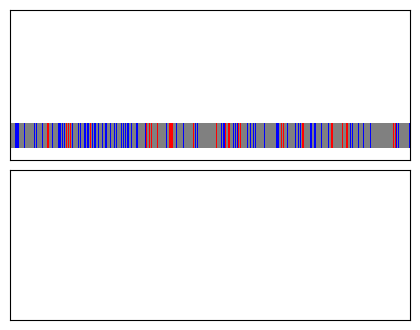

In [76]:
figureWidth=5
figureHeight=5
panelWidth=4
panelHeight=1.5
plt.figure(figsize=(figureWidth,figureHeight))
panel1 = plt.axes([0.1/figureWidth,3.3/figureHeight,panelWidth/figureWidth,panelHeight/figureHeight])
panel2 = plt.axes([0.1/figureWidth,1.7/figureHeight,panelWidth/figureWidth,panelHeight/figureHeight])
panel1.tick_params(bottom=False, labelbottom=False,
                   left=False, labelleft=False,
                   right=False, labelright=False,
                   top=False, labeltop=False)
panel2.tick_params(bottom=False, labelbottom=False,
                   left=False, labelleft=False,
                   right=False, labelright=False,
                   top=False, labeltop=False)

panel1.set_xlim(pStart, pEnd)
panel1.set_ylim(-1,10)

bottom = 0
height = 1
line_width = 0

for pos in range(pStart,pEnd):
    color = 'Grey'
    if pos-pStart in modScores:
        if modScores[pos-pStart] > 0.5:
            color = 'Red'
        else:
            color = 'Blue'
    rectangle = mplpatches.Rectangle([pos, bottom-(height/
                                                   2)], pos+1, height,
                                facecolor = color,
                                edgecolor = 'black',
                                linewidth = line_width)
    panel1.add_patch(rectangle)